In [4]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Loading  and preparing the data

In [20]:
#replace with folder with files
base_folder = '../data'
data_w2v = pd.read_csv(os.path.join(base_folder,'experiments','experiments_w2v.csv'))
data_d2v = pd.read_csv(os.path.join(base_folder,'experiments_d2v','experiments_d2v.csv'))
data_sw = pd.read_csv(os.path.join(base_folder,'experiments_sw','experiments_sw.csv'))
data_ft = pd.read_csv(os.path.join(base_folder,'experiments_ft','experiments_ft.csv'))
data_dft = pd.read_csv(os.path.join(base_folder,'experiments_dft','experiments_dft.csv'))

In [21]:
data = data_w2v.append(data_sw).append(data_d2v).append(data_ft).append(data_dft)
data.head()

algorithm  avg_score  epoch  experiment  learning_rate  mc-30  mc-30_oov  \
0       w2v      0.169      1           1          0.025  0.467          0   
1       w2v      0.196      3           1          0.025  0.517          0   
2       w2v      0.187      5           1          0.025  0.558          0   
3       w2v      0.186      7           1          0.025  0.437          0   
4       w2v      0.169      1           1          0.025  0.464          0   

   men-tr-3k  men-tr-3k_oov  mturk-287     ...      weak_draws  window_size  \
0      0.263              0      0.404     ...             NaN            3   
1      0.340              0      0.410     ...             NaN            3   
2      0.333              0      0.453     ...             NaN            3   
3      0.330              0      0.458     ...             NaN            3   
4      0.288              0      0.441     ...             NaN            3   

   ws-353-all  ws-353-all_oov  ws-353-rel  ws-353-rel_oov  ws-353-sim  \
0       0.338               0       0.290               0       0.417   
1       0.307               0       0.217               0       0.409   
2       0.299               0       0.228               0       0.382   
3       0.337               0       0.279               0       0.426   
4       0.252               0       0.162               0       0.352   

   ws-353-sim_oov  yp-130  yp-130_oov  
0               0   0.159           3  
1               0   0.076           3  
2               0   0.086           3  
3               0   0.056           3  
4               0   0.140           3  

[5 rows x 40 columns]

In [7]:
data['algorithm'].unique()

array(['w2v', 'sw', 'd2v', 'ft', 'dft'], dtype=object)

In [10]:
data.columns

Index(['algorithm', 'avg_score', 'epoch', 'experiment', 'learning_rate',
       'mc-30', 'mc-30_oov', 'men-tr-3k', 'men-tr-3k_oov', 'mturk-287',
       'mturk-287_oov', 'mturk-771', 'mturk-771_oov', 'negative_sampling',
       'ngrams', 'rg-65', 'rg-65_oov', 'run', 'rw-stanford', 'rw-stanford_oov',
       'sampling', 'simlex999', 'simlex999_oov', 'simverb-3500',
       'simverb-3500_oov', 'strong_beta', 'strong_draws', 'time',
       'vector_size', 'weak_beta', 'weak_draws', 'window_size', 'ws-353-all',
       'ws-353-all_oov', 'ws-353-rel', 'ws-353-rel_oov', 'ws-353-sim',
       'ws-353-sim_oov', 'yp-130', 'yp-130_oov'],
      dtype='object')

In [22]:
data = data[data['negative_sampling'] != 25] #only one of the models was trained with this value
data = data[data['epoch'] > 1] #not very useful for results
data = data[(data['ngrams'] != 1)] # poor performance
data = data[data['run']==1] # only considering 1 run because of the amount

# easier to graph
data.loc[data['sampling'] == 0.0001, 'sampling'] = -4
data.loc[data['sampling'] == 0.001, 'sampling'] = -3
data.loc[data['sampling'] == 0.01, 'sampling'] = -2
data.loc[data['sampling'] == 0.1, 'sampling'] = -1
data.loc[:,'sampling'] = data['sampling'].astype('int')

# original time is in seconds
data['time'] /= 60
data = data.round(3)
data.head()

algorithm  avg_score  epoch  experiment  learning_rate  mc-30  mc-30_oov  \
1        w2v      0.196      3           1          0.025  0.517          0   
2        w2v      0.187      5           1          0.025  0.558          0   
3        w2v      0.186      7           1          0.025  0.437          0   
13       w2v      0.147      3           2          0.025  0.318          0   
14       w2v      0.141      5           2          0.025  0.380          0   

    men-tr-3k  men-tr-3k_oov  mturk-287     ...      weak_draws  window_size  \
1       0.340              0      0.410     ...             NaN            3   
2       0.333              0      0.453     ...             NaN            3   
3       0.330              0      0.458     ...             NaN            3   
13      0.262              0      0.393     ...             NaN            3   
14      0.244              0      0.399     ...             NaN            3   

    ws-353-all  ws-353-all_oov  ws-353-rel  ws-353-rel_oov  ws-353-sim  \
1        0.307               0       0.217               0       0.409   
2        0.299               0       0.228               0       0.382   
3        0.337               0       0.279               0       0.426   
13       0.237               0       0.141               0       0.320   
14       0.277               0       0.200               0       0.363   

    ws-353-sim_oov  yp-130  yp-130_oov  
1                0   0.076           3  
2                0   0.086           3  
3                0   0.056           3  
13               0   0.079           3  
14               0   0.026           3  

[5 rows x 40 columns]

## Word2Vec Analysis

In [23]:
data_w2v = data[data['algorithm']=='w2v']
data_w2v.head()


algorithm  avg_score  epoch  experiment  learning_rate  mc-30  mc-30_oov  \
1        w2v      0.196      3           1          0.025  0.517          0   
2        w2v      0.187      5           1          0.025  0.558          0   
3        w2v      0.186      7           1          0.025  0.437          0   
13       w2v      0.147      3           2          0.025  0.318          0   
14       w2v      0.141      5           2          0.025  0.380          0   

    men-tr-3k  men-tr-3k_oov  mturk-287     ...      weak_draws  window_size  \
1       0.340              0      0.410     ...             NaN            3   
2       0.333              0      0.453     ...             NaN            3   
3       0.330              0      0.458     ...             NaN            3   
13      0.262              0      0.393     ...             NaN            3   
14      0.244              0      0.399     ...             NaN            3   

    ws-353-all  ws-353-all_oov  ws-353-rel  ws-353-rel_oov  ws-353-sim  \
1        0.307               0       0.217               0       0.409   
2        0.299               0       0.228               0       0.382   
3        0.337               0       0.279               0       0.426   
13       0.237               0       0.141               0       0.320   
14       0.277               0       0.200               0       0.363   

    ws-353-sim_oov  yp-130  yp-130_oov  
1                0   0.076           3  
2                0   0.086           3  
3                0   0.056           3  
13               0   0.079           3  
14               0   0.026           3  

[5 rows x 40 columns]

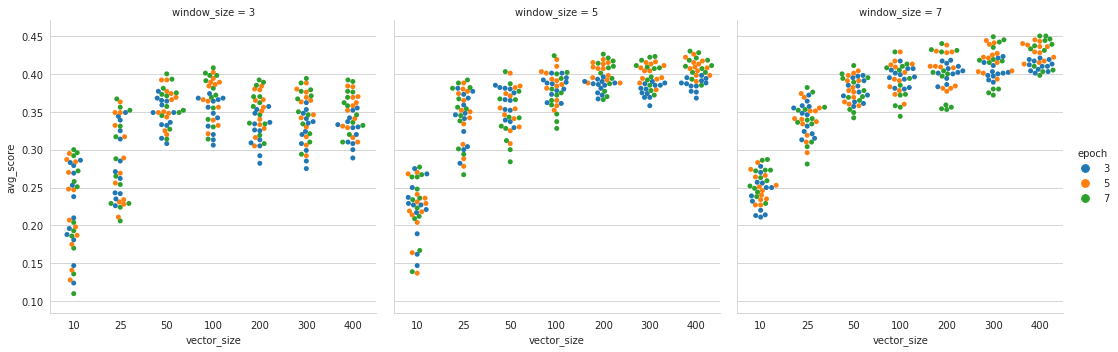

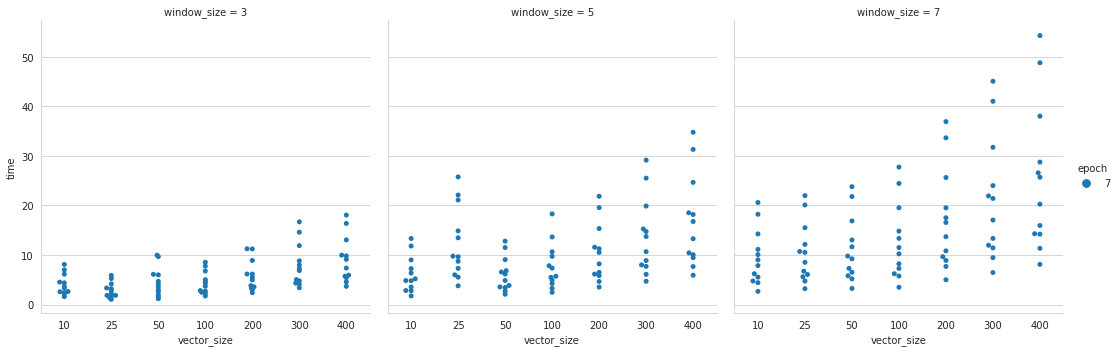

In [24]:
sns.catplot(x='vector_size', y='avg_score', hue='epoch', col='window_size', data=data_w2v, kind='swarm')
sns.catplot(x='vector_size', y='time', hue='epoch', col='window_size', data=data_w2v[data_w2v['epoch']==7], kind='swarm')

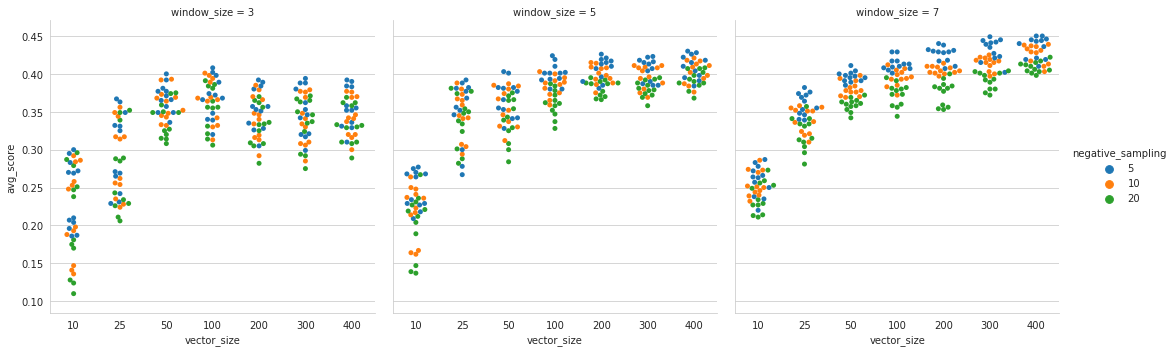

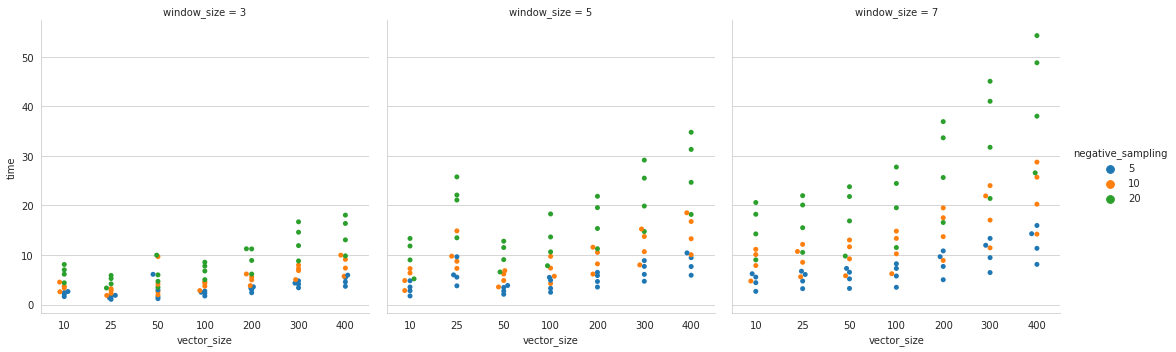

In [25]:
sns.catplot("vector_size", "avg_score", data=data_w2v, col='window_size', hue='negative_sampling', kind='swarm')
sns.catplot("vector_size", "time", data=data_w2v[data_w2v['epoch']==7], col='window_size', hue='negative_sampling', kind='swarm')

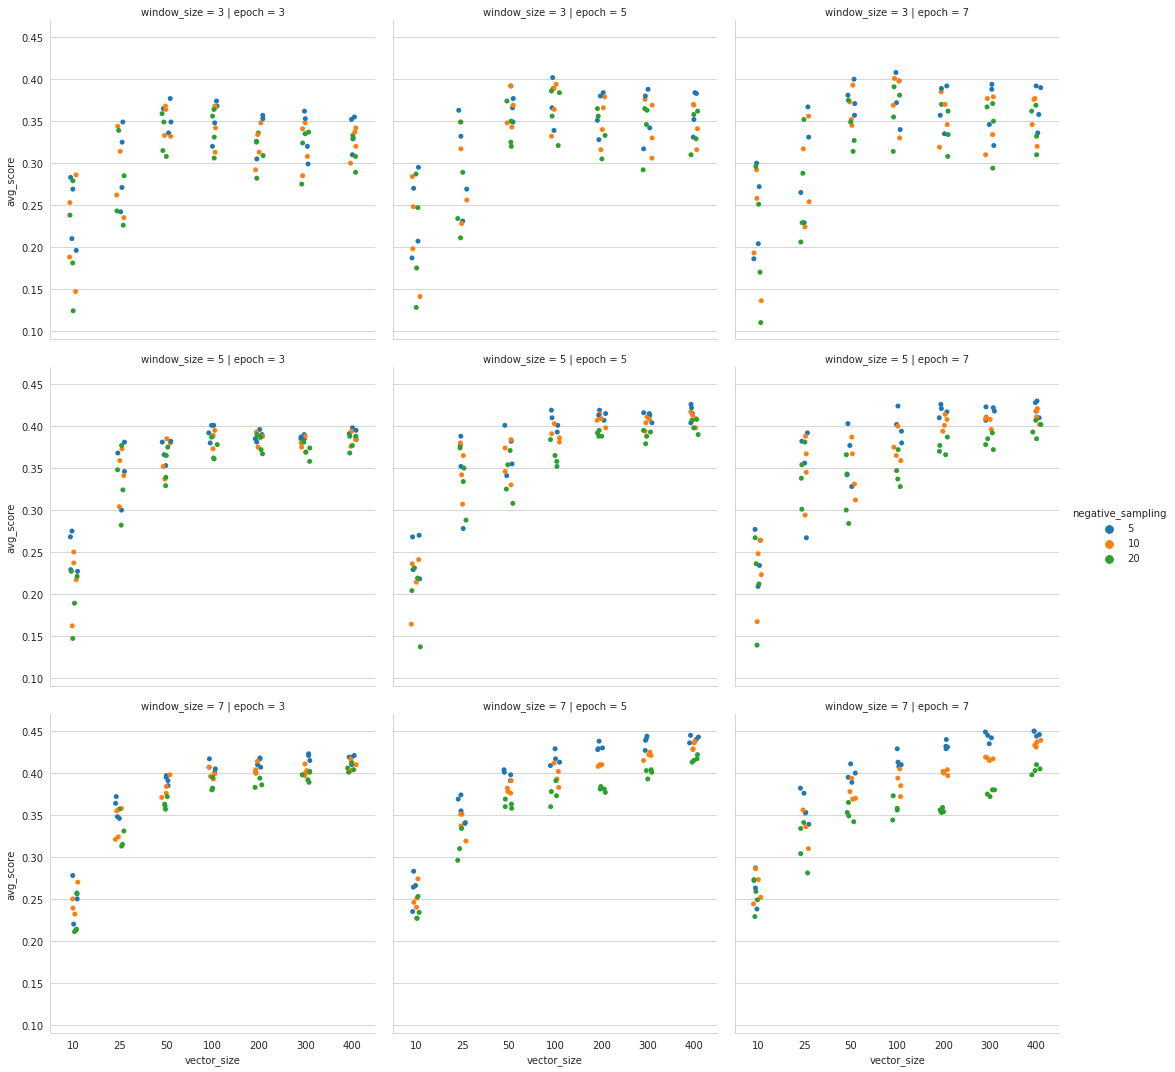

In [26]:
sns.catplot("vector_size", "avg_score", data=data_w2v, row='window_size', hue='negative_sampling', col='epoch')

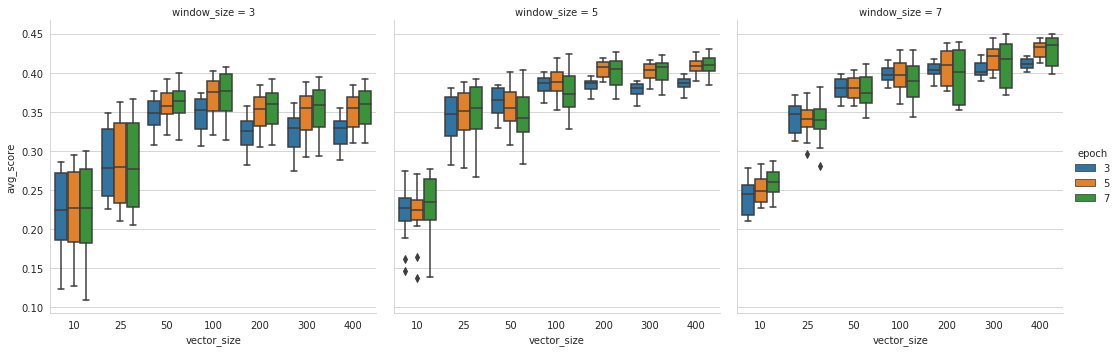

In [27]:
sns.catplot(x='vector_size', y='avg_score', data=data_w2v, kind='box', col='window_size', hue='epoch')

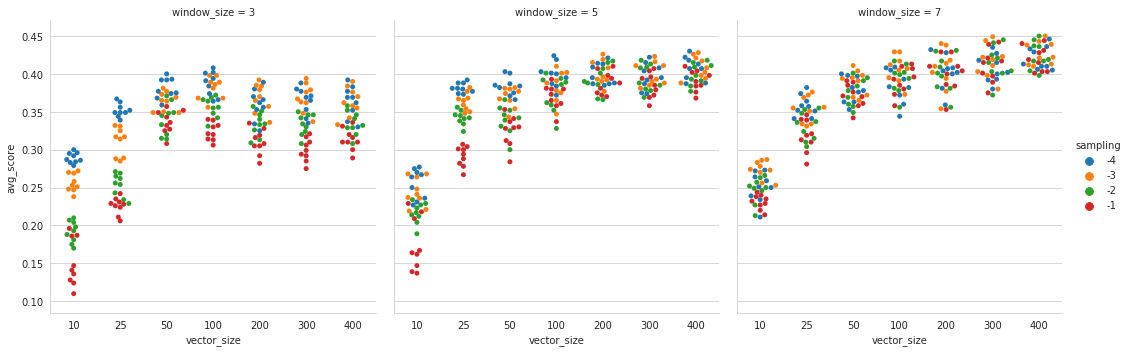

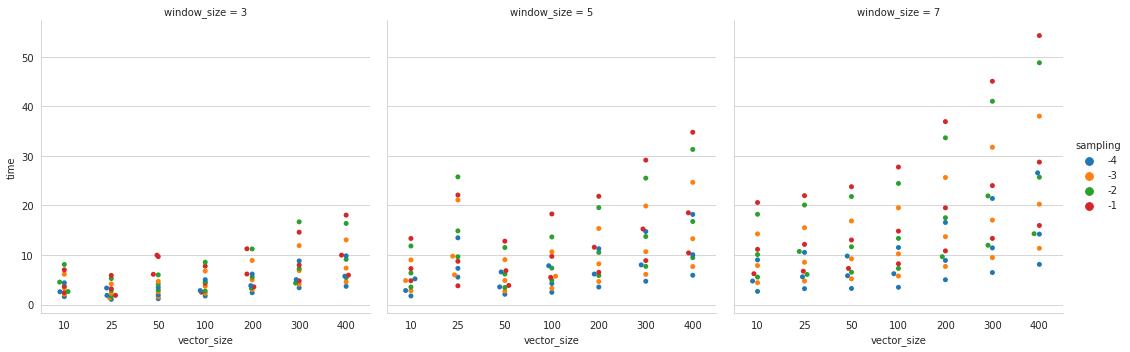

In [28]:
sns.catplot("vector_size", "avg_score", data=data_w2v, hue='sampling', kind='swarm', col='window_size')
sns.catplot("vector_size", "time", data=data_w2v[data_w2v['epoch']==7], hue='sampling', kind='swarm', col='window_size')

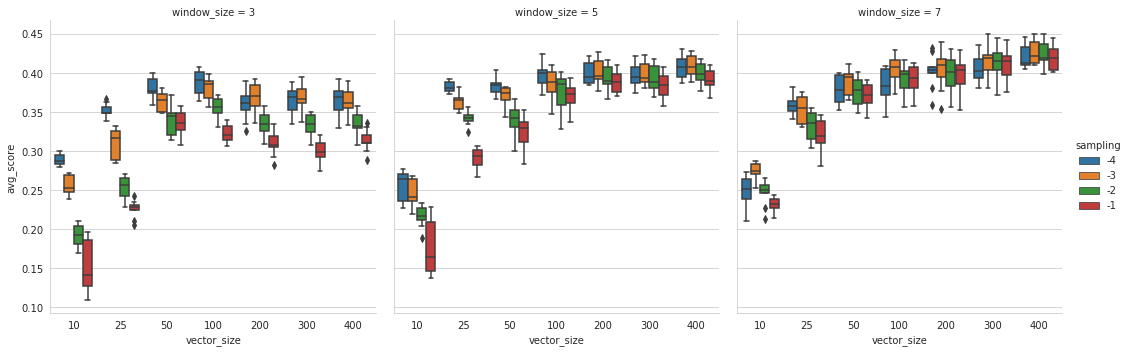

In [29]:
sns.catplot("vector_size", "avg_score", data=data_w2v, hue='sampling', kind='box', col='window_size')

In [30]:
cols = ['epoch', 'vector_size', 'window_size', 'sampling', 'negative_sampling', 'avg_score', 'time']
data_w2v[cols].sort_values('avg_score', ascending=False).head()

epoch  vector_size  window_size  sampling  negative_sampling  avg_score  \
2583      7          400            7        -2                  5      0.450   
2595      7          400            7        -3                  5      0.450   
2559      7          300            7        -3                  5      0.449   
2307      7          400            7        -4                  5      0.446   
2547      7          300            7        -2                  5      0.445   

        time  
2583  14.295  
2595  11.349  
2559   9.468  
2307   8.110  
2547  11.964

## FastText analysis

In [31]:
data_ft = data[data['algorithm']=='ft']
data_ft.loc[:,'ngrams'] = data_ft['ngrams'].astype('int')
data_ft.head()

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


algorithm  avg_score  epoch  experiment  learning_rate  mc-30  mc-30_oov  \
1        ft      0.228      3           1          0.025  0.338          0   
2        ft      0.247      5           1          0.025  0.456          0   
3        ft      0.258      7           1          0.025  0.485          0   
5        ft      0.233      3           2          0.025  0.359          0   
6        ft      0.255      5           2          0.025  0.500          0   

   men-tr-3k  men-tr-3k_oov  mturk-287     ...      weak_draws  window_size  \
1      0.356              0      0.411     ...             NaN            3   
2      0.405              0      0.439     ...             NaN            3   
3      0.414              0      0.473     ...             NaN            3   
5      0.387              0      0.393     ...             NaN            3   
6      0.422              0      0.462     ...             NaN            3   

   ws-353-all  ws-353-all_oov  ws-353-rel  ws-353-rel_oov  ws-353-sim  \
1       0.295               0       0.163               0       0.413   
2       0.360               0       0.249               0       0.475   
3       0.389               0       0.257               0       0.526   
5       0.319               0       0.174               0       0.454   
6       0.351               0       0.207               0       0.483   

   ws-353-sim_oov  yp-130  yp-130_oov  
1               0   0.070           0  
2               0   0.120           0  
3               0   0.164           0  
5               0   0.175           0  
6               0   0.193           0  

[5 rows x 40 columns]

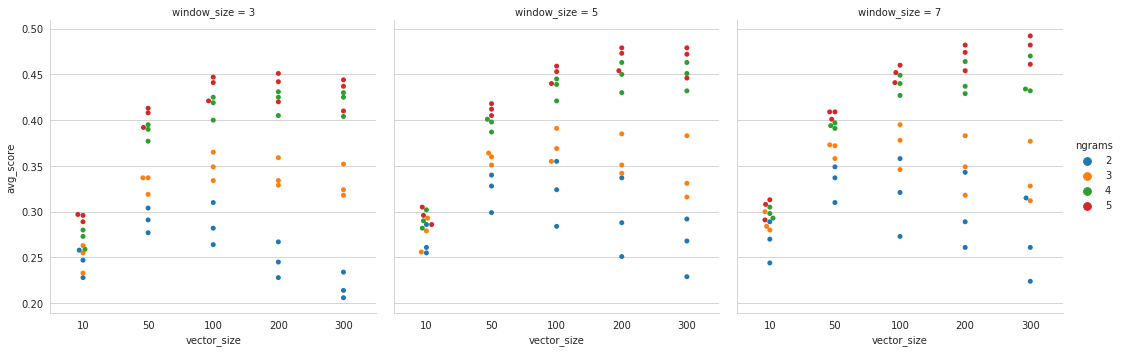

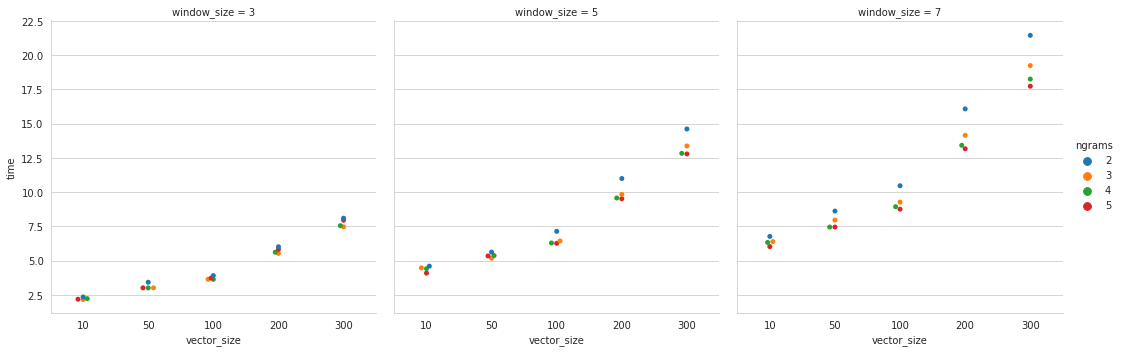

In [32]:
sns.catplot("vector_size", "avg_score", data=data_ft, kind='swarm', col='window_size', hue='ngrams')
sns.catplot("vector_size", "time", data=data_ft[data_ft['epoch']==7], kind='swarm', col='window_size', hue='ngrams')

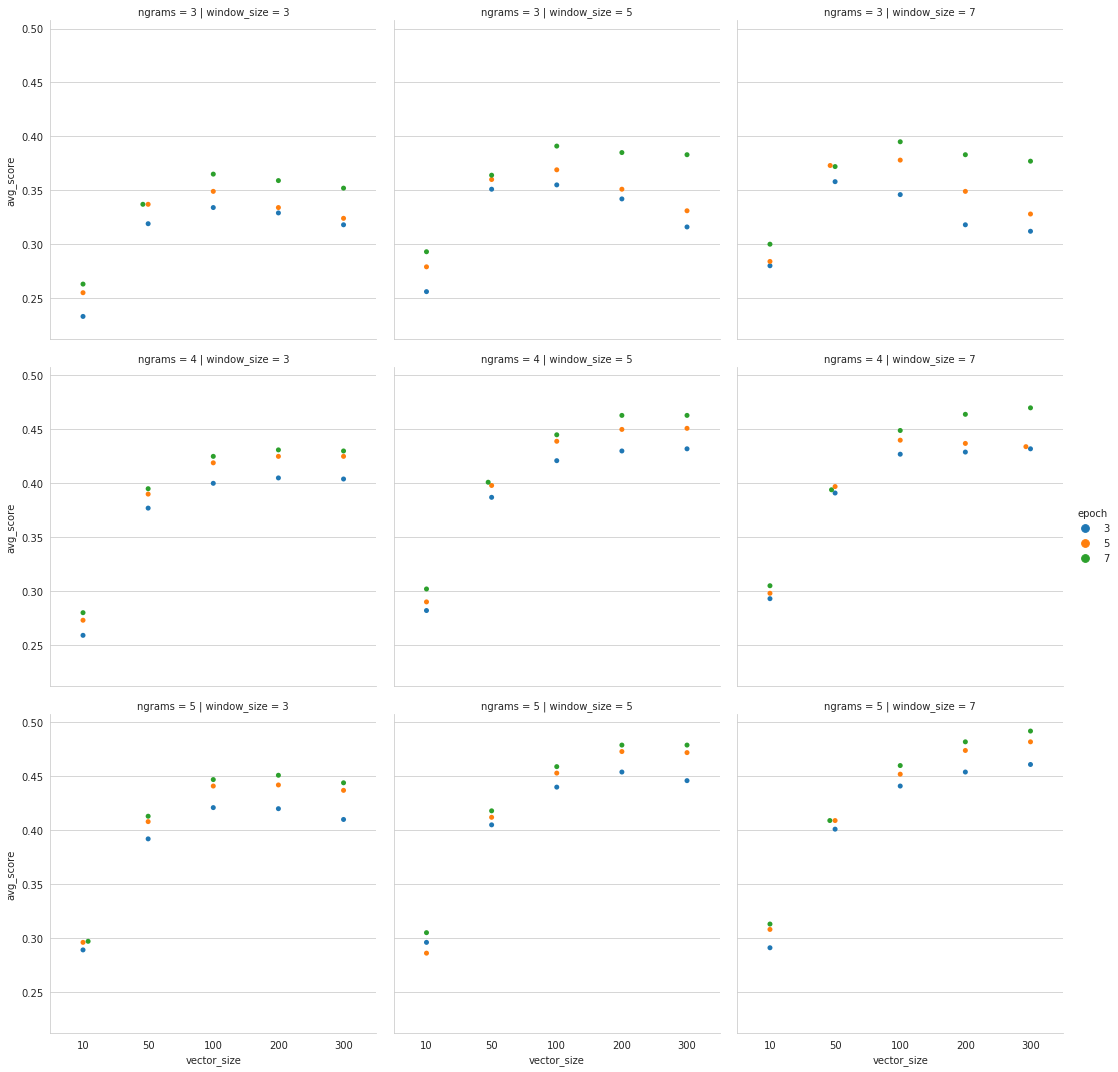

In [33]:
sns.catplot("vector_size", "avg_score", data=data_ft[data_ft['ngrams']>2], kind='swarm', col='window_size', hue='epoch', row='ngrams')

In [34]:
cols = ['epoch', 'vector_size', 'window_size', 'ngrams', 'avg_score', 'time']
#data_ft.loc[data_ft.groupby(['window_size', 'vector_size'])['avg_score'].idxmax()][cols].sort_values('avg_score', ascending=False)
data_ft[cols].sort_values('avg_score', ascending=False).head()

epoch  vector_size  window_size  ngrams  avg_score    time
239      7          300            7       5      0.492  17.731
238      5          300            7       5      0.482  17.731
191      7          200            7       5      0.482  13.161
223      7          300            5       5      0.479  12.786
175      7          200            5       5      0.479   9.514

## Subword Analysis

In [35]:
data_sw = data[data['algorithm']=='sw']
data_sw.loc[:,'ngrams'] = data_sw['ngrams'].astype('int')
data_sw.head()

algorithm  avg_score  epoch  experiment  learning_rate  mc-30  mc-30_oov  \
1        sw      0.041      3           1          0.025  0.183          0   
2        sw      0.038      5           1          0.025  0.011          0   
3        sw      0.039      7           1          0.025  0.113          0   
5        sw      0.110      3           2          0.025 -0.066          0   
6        sw      0.109      5           2          0.025 -0.147          0   

   men-tr-3k  men-tr-3k_oov  mturk-287     ...      weak_draws  window_size  \
1      0.067              0      0.141     ...             NaN            3   
2      0.078              0      0.140     ...             NaN            3   
3      0.079              0      0.174     ...             NaN            3   
5      0.200              0      0.264     ...             NaN            3   
6      0.204              0      0.249     ...             NaN            3   

   ws-353-all  ws-353-all_oov  ws-353-rel  ws-353-rel_oov  ws-353-sim  \
1      -0.019               0      -0.005               0       0.019   
2      -0.018               0      -0.021               0       0.052   
3       0.028               0       0.002               0       0.109   
5       0.151               0       0.121               0       0.207   
6       0.129               0       0.110               0       0.158   

   ws-353-sim_oov  yp-130  yp-130_oov  
1               0   0.037           0  
2               0   0.009           0  
3               0  -0.006           0  
5               0   0.100           0  
6               0   0.072           0  

[5 rows x 40 columns]

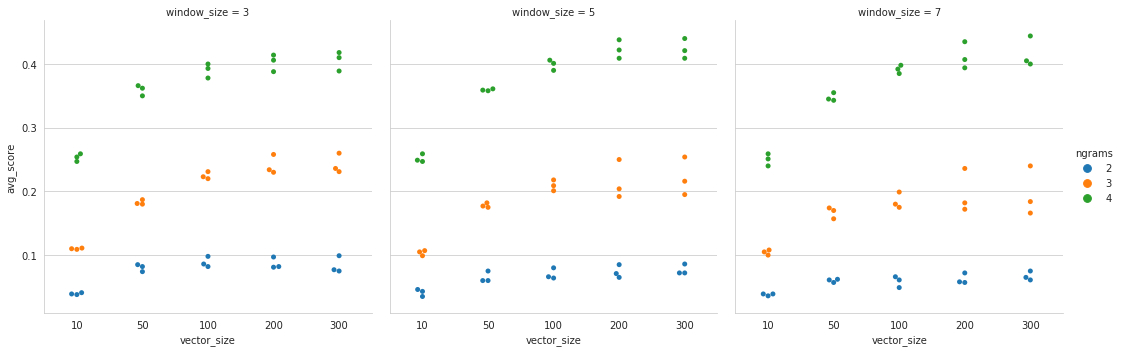

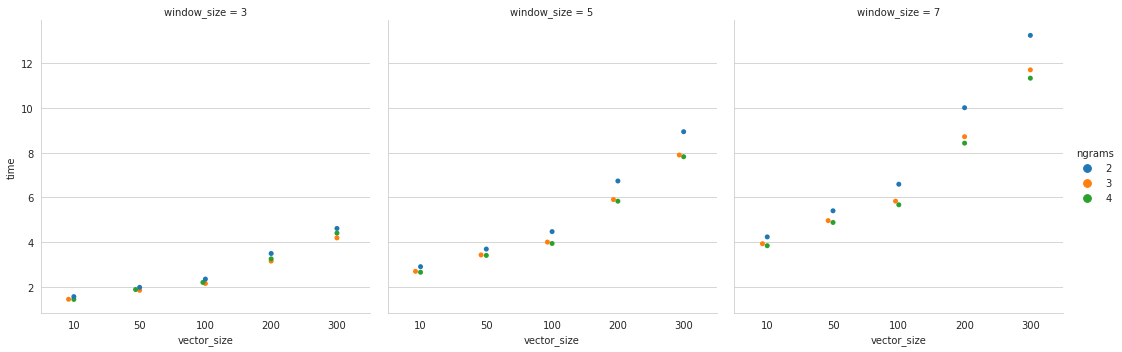

In [36]:
sns.catplot("vector_size", "avg_score", data=data_sw,  kind='swarm', col='window_size', hue='ngrams')
sns.catplot("vector_size", "time", data=data_sw[data_sw['epoch']==7], kind='swarm', col='window_size', hue='ngrams')

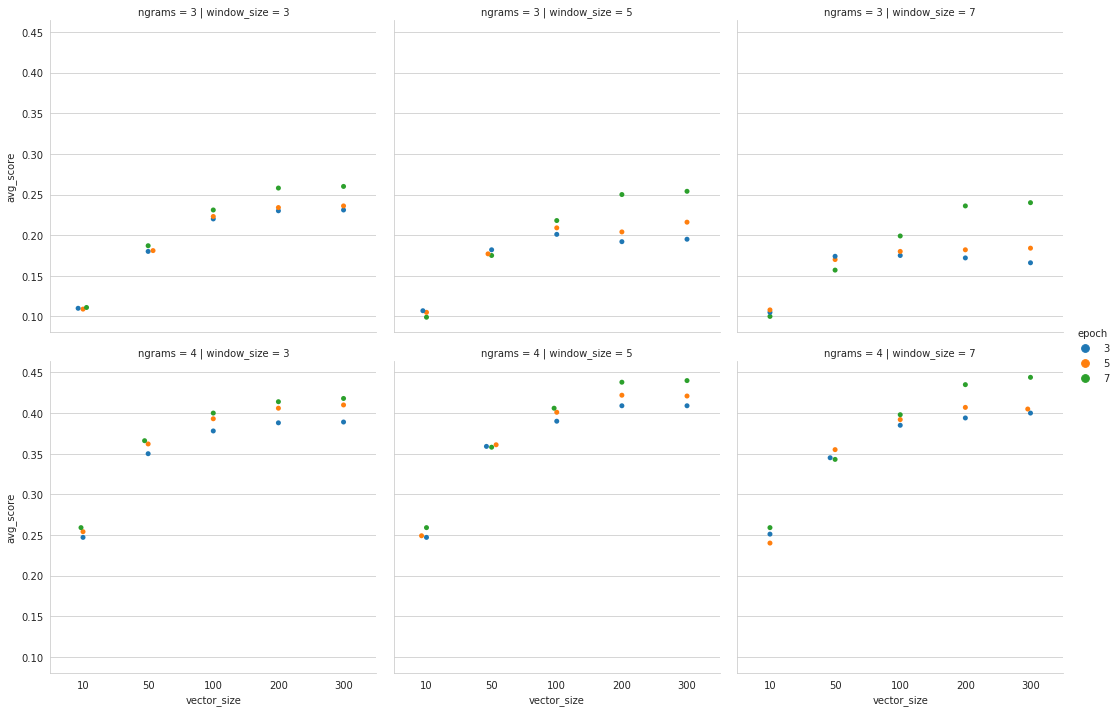

In [37]:
sns.catplot("vector_size", "avg_score", data=data_sw[data_sw['ngrams']>2], kind='swarm', col='window_size', hue='epoch', row='ngrams')

In [38]:
cols = ['epoch', 'vector_size', 'window_size', 'sampling', 'negative_sampling', 'ngrams', 'avg_score', 'time']
data_sw.loc[data_sw.groupby(['window_size', 'vector_size'])['avg_score'].idxmax()][cols].sort_values('avg_score', ascending=False)

epoch  vector_size  window_size  sampling  negative_sampling  ngrams  \
179      7          300            7        -4                  5       4   
167      7          300            5        -4                  5       4   
131      7          200            5        -4                  5       4   
143      7          200            7        -4                  5       4   
155      7          300            3        -4                  5       4   
119      7          200            3        -4                  5       4   
95       7          100            5        -4                  5       4   
83       7          100            3        -4                  5       4   
107      7          100            7        -4                  5       4   
47       7           50            3        -4                  5       4   
58       5           50            5        -4                  5       4   
70       5           50            7        -4                  5       4   
11       7           10            3        -4                  5       4   
23       7           10            5        -4                  5       4   
35       7           10            7        -4                  5       4   

     avg_score    time  
179      0.444  11.336  
167      0.440   7.821  
131      0.438   5.831  
143      0.435   8.429  
155      0.418   4.402  
119      0.414   3.249  
95       0.406   3.937  
83       0.400   2.195  
107      0.398   5.670  
47       0.366   1.876  
58       0.361   3.404  
70       0.355   4.878  
11       0.259   1.433  
23       0.259   2.649  
35       0.259   3.837

## FastText + Subwords

In [39]:
data_fts = data_ft.append(data_sw).reset_index(drop=True)
#data_fts.reset_index()
data_fts.loc[:,'ngrams'] = data_fts['ngrams'].astype('int')
data_fts.loc[:,'algorithm-ngrams']=data_fts['algorithm']+'-'+data_fts['ngrams'].astype('str')
data_fts.head()

algorithm  avg_score  epoch  experiment  learning_rate  mc-30  mc-30_oov  \
0        ft      0.228      3           1          0.025  0.338          0   
1        ft      0.247      5           1          0.025  0.456          0   
2        ft      0.258      7           1          0.025  0.485          0   
3        ft      0.233      3           2          0.025  0.359          0   
4        ft      0.255      5           2          0.025  0.500          0   

   men-tr-3k  men-tr-3k_oov  mturk-287        ...         window_size  \
0      0.356              0      0.411        ...                   3   
1      0.405              0      0.439        ...                   3   
2      0.414              0      0.473        ...                   3   
3      0.387              0      0.393        ...                   3   
4      0.422              0      0.462        ...                   3   

   ws-353-all  ws-353-all_oov  ws-353-rel  ws-353-rel_oov  ws-353-sim  \
0       0.295               0       0.163               0       0.413   
1       0.360               0       0.249               0       0.475   
2       0.389               0       0.257               0       0.526   
3       0.319               0       0.174               0       0.454   
4       0.351               0       0.207               0       0.483   

   ws-353-sim_oov  yp-130  yp-130_oov  algorithm-ngrams  
0               0   0.070           0              ft-2  
1               0   0.120           0              ft-2  
2               0   0.164           0              ft-2  
3               0   0.175           0              ft-3  
4               0   0.193           0              ft-3  

[5 rows x 41 columns]

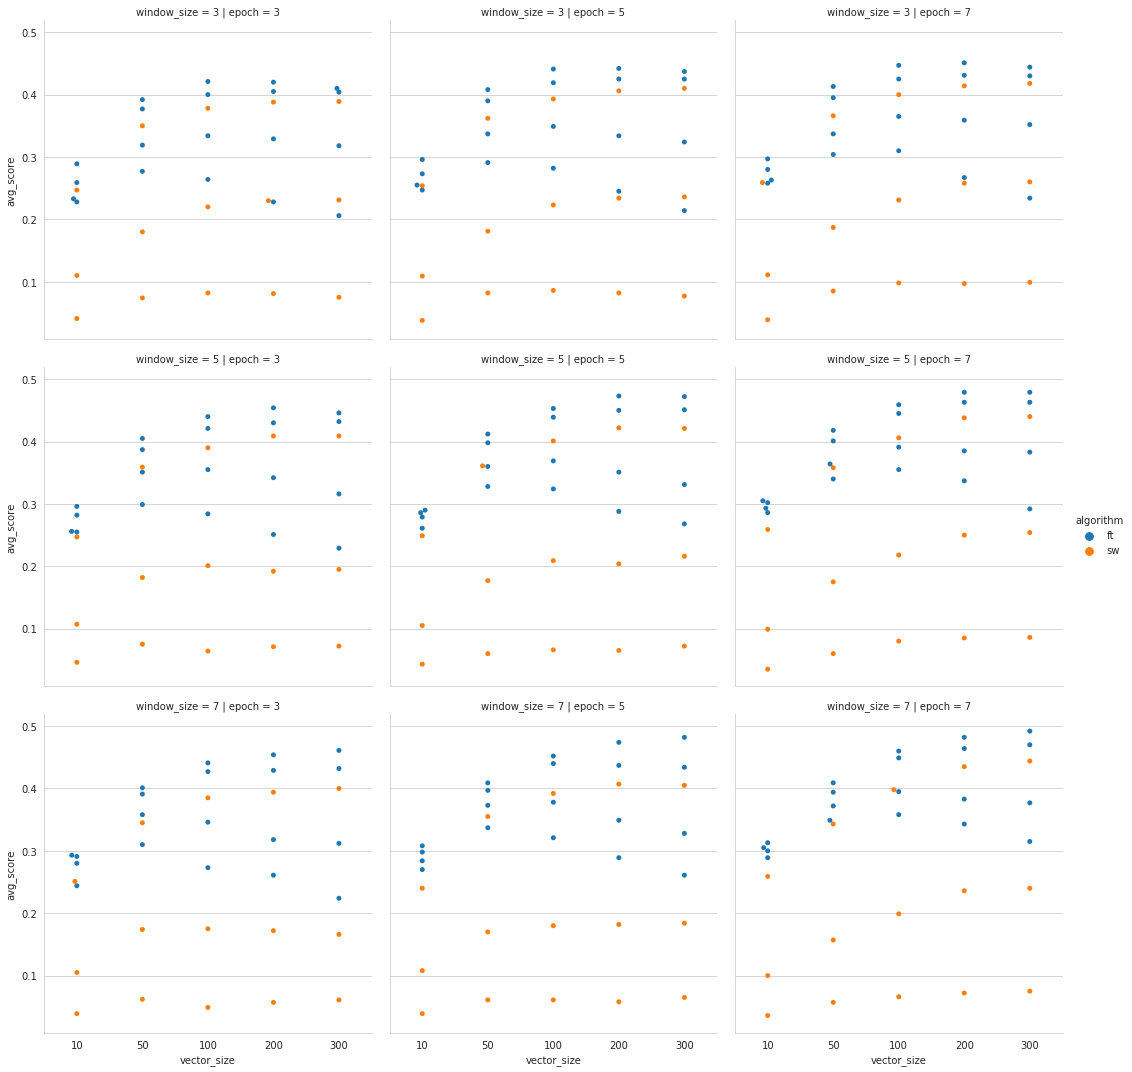

In [40]:
sns.catplot("vector_size", "avg_score", data=data_fts, kind='swarm', row='window_size', col='epoch', hue='algorithm')

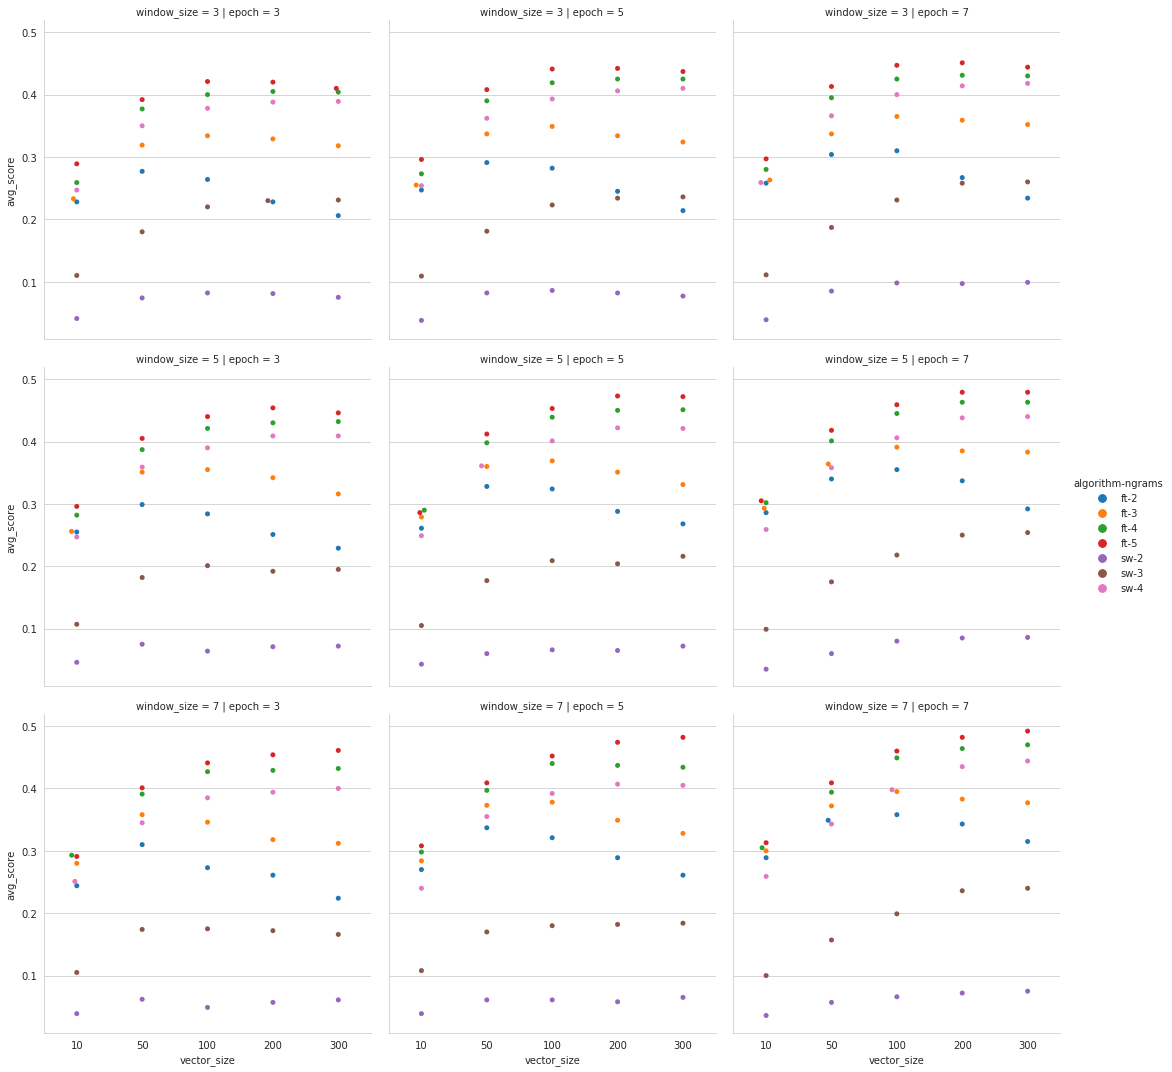

In [41]:
sns.catplot("vector_size", "avg_score", data=data_fts, kind='swarm', row='window_size', col='epoch', hue='algorithm-ngrams')

In [42]:
cols = ['algorithm', 'epoch', 'vector_size', 'window_size', 'ngrams', 'avg_score', 'time']
data_fts[data_fts['algorithm']=='ft'][cols].sort_values('avg_score', ascending=False).head()

algorithm  epoch  vector_size  window_size  ngrams  avg_score    time
179        ft      7          300            7       5      0.492  17.731
178        ft      5          300            7       5      0.482  17.731
143        ft      7          200            7       5      0.482  13.161
167        ft      7          300            5       5      0.479  12.786
131        ft      7          200            5       5      0.479   9.514

In [43]:
data_fts[data_fts['algorithm']=='sw'][cols].sort_values('avg_score', ascending=False).head()

algorithm  epoch  vector_size  window_size  ngrams  avg_score    time
314        sw      7          300            7       4      0.444  11.336
305        sw      7          300            5       4      0.440   7.821
278        sw      7          200            5       4      0.438   5.831
287        sw      7          200            7       4      0.435   8.429
277        sw      5          200            5       4      0.422   5.831

## Dict2Vec analysis

In [44]:
data_d2v = data[data['algorithm']=='d2v']
data_d2v.loc[:,'strong_draws'] = data_d2v['strong_draws'].astype('int')
data_d2v.loc[:,'weak_draws'] = data_d2v['weak_draws'].astype('int')
data_d2v.head()

algorithm  avg_score  epoch  experiment  learning_rate  mc-30  mc-30_oov  \
1       d2v      0.404      3           1          0.025  0.744          0   
2       d2v      0.410      5           1          0.025  0.806          0   
3       d2v      0.410      7           1          0.025  0.790          0   
5       d2v      0.406      3           2          0.025  0.780          0   
6       d2v      0.397      5           2          0.025  0.785          0   

   men-tr-3k  men-tr-3k_oov  mturk-287     ...      weak_draws  window_size  \
1      0.575              0      0.596     ...               2            3   
2      0.586              0      0.615     ...               2            3   
3      0.586              0      0.600     ...               2            3   
5      0.573              0      0.627     ...               2            3   
6      0.571              0      0.610     ...               2            3   

   ws-353-all  ws-353-all_oov  ws-353-rel  ws-353-rel_oov  ws-353-sim  \
1       0.525               0       0.437               0       0.646   
2       0.562               0       0.471               0       0.685   
3       0.545               0       0.444               0       0.672   
5       0.546               0       0.449               0       0.673   
6       0.515               0       0.418               0       0.618   

   ws-353-sim_oov  yp-130  yp-130_oov  
1               0   0.393           3  
2               0   0.370           3  
3               0   0.399           3  
5               0   0.378           3  
6               0   0.380           3  

[5 rows x 40 columns]

In [45]:
data_d2v.loc[:,'sd-sb']=data_d2v['strong_draws'].astype('int').astype('str')+'-'+data_d2v['strong_beta'].astype('str')
data_d2v.loc[:,'wd-wb']=data_d2v['weak_draws'].astype('int').astype('str')+'-'+data_d2v['weak_beta'].astype('str')
data_d2v[['sd-sb', 'wd-wb']].head()

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


sd-sb   wd-wb
1  2-0.2   2-0.3
2  2-0.2   2-0.3
3  2-0.2   2-0.3
5  2-0.2  2-0.45
6  2-0.2  2-0.45

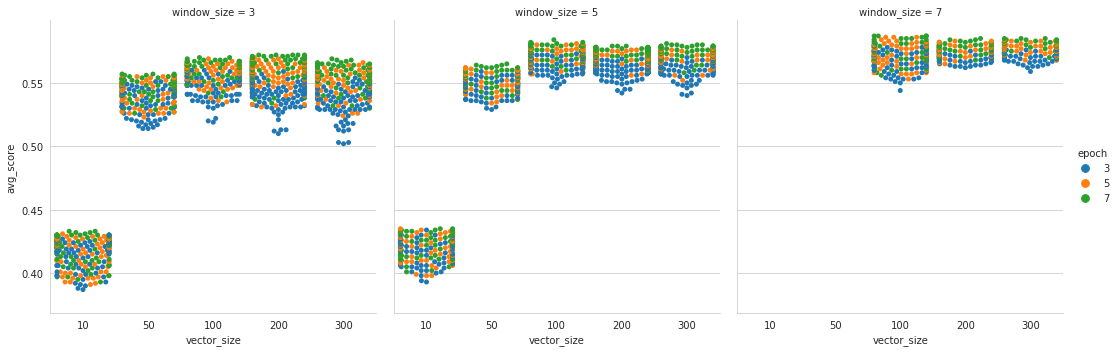

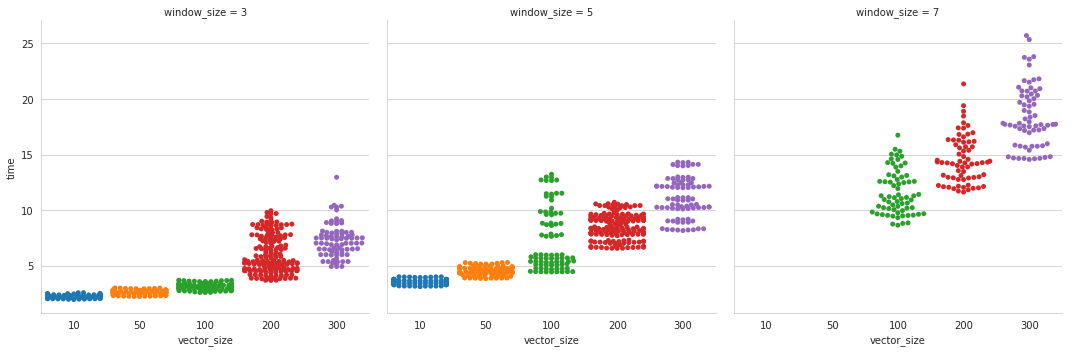

In [46]:
sns.catplot("vector_size", "avg_score", data=data_d2v, kind='swarm', col='window_size', hue='epoch')
sns.catplot("vector_size", "time", data=data_d2v[data_d2v['epoch']==7], kind='swarm', col='window_size')

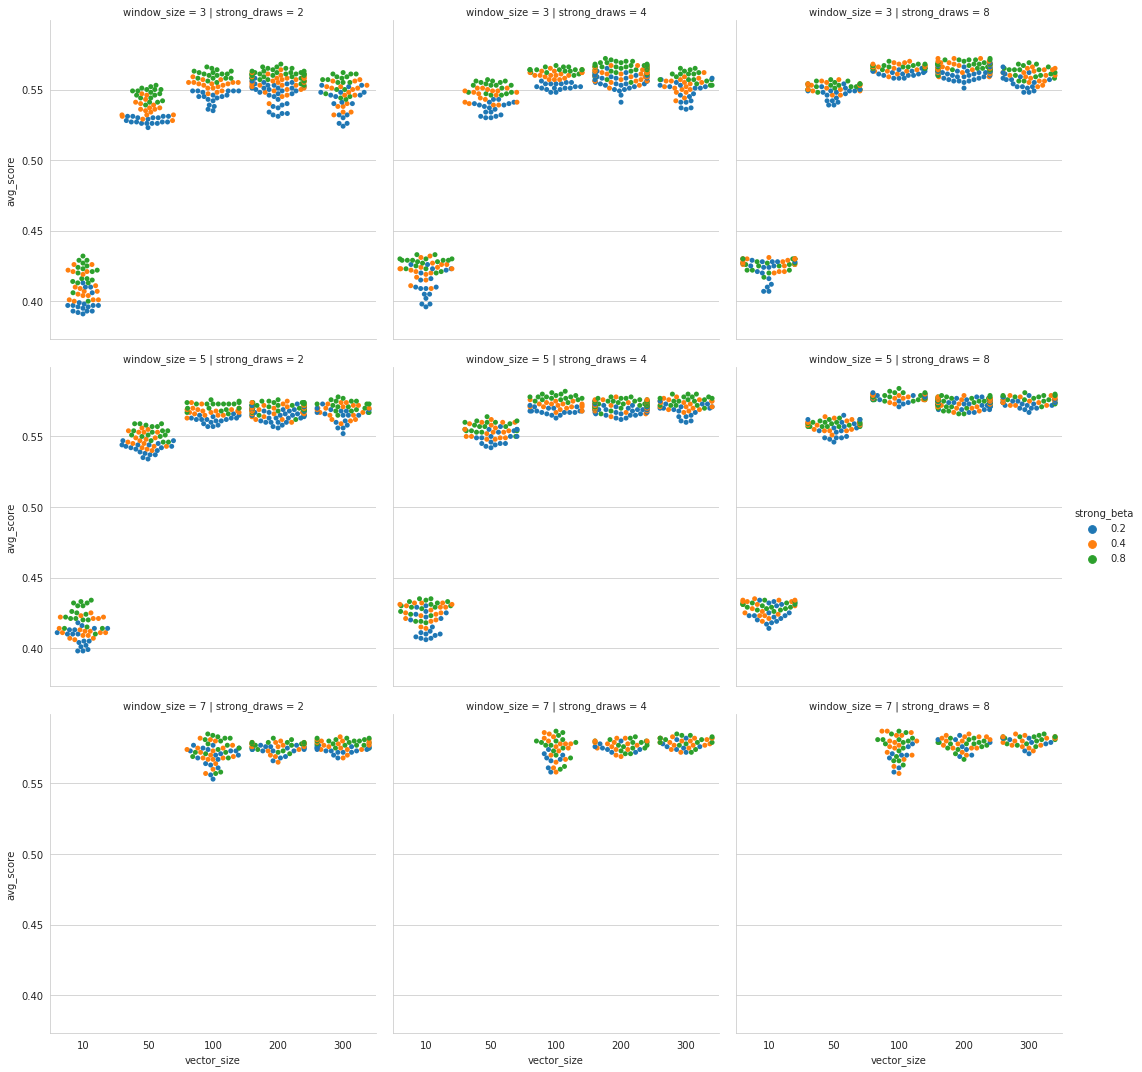

In [47]:
sns.catplot("vector_size", "avg_score", data=data_d2v[data_d2v['epoch']>3], kind='swarm', row='window_size', col='strong_draws', hue='strong_beta')#.set(ylim=(0.55,0.58))

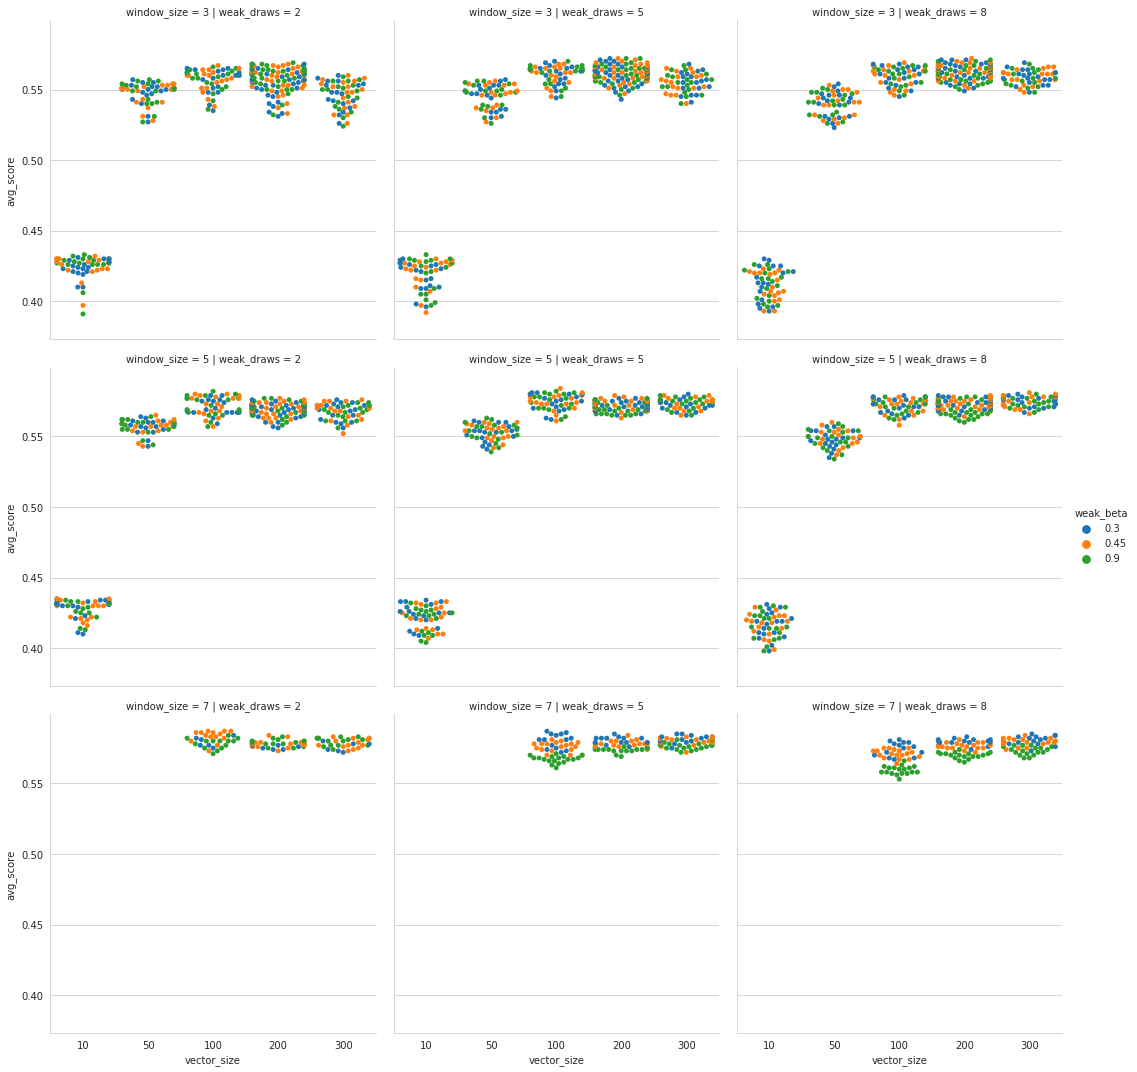

In [48]:
sns.catplot("vector_size", "avg_score", data=data_d2v[data_d2v['epoch']>3], kind='swarm', row='window_size', col='weak_draws', hue='weak_beta')

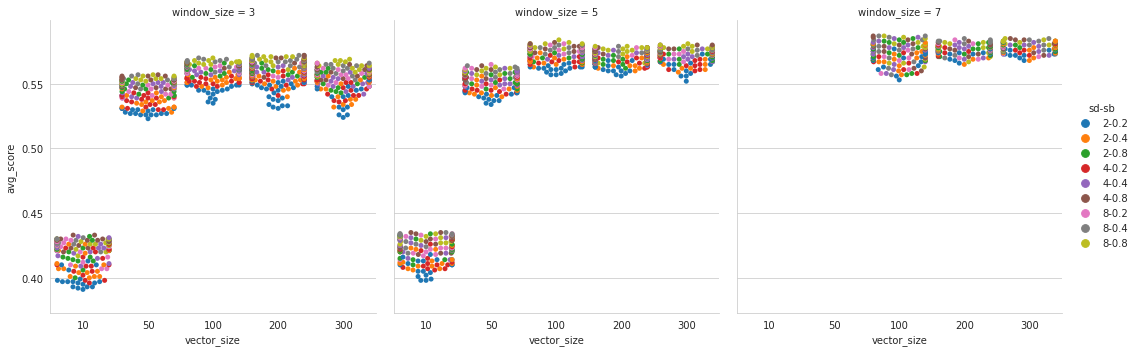

In [49]:
sns.catplot("vector_size", "avg_score", data=data_d2v[data_d2v['epoch']>3], kind='swarm', col='window_size', hue='sd-sb')

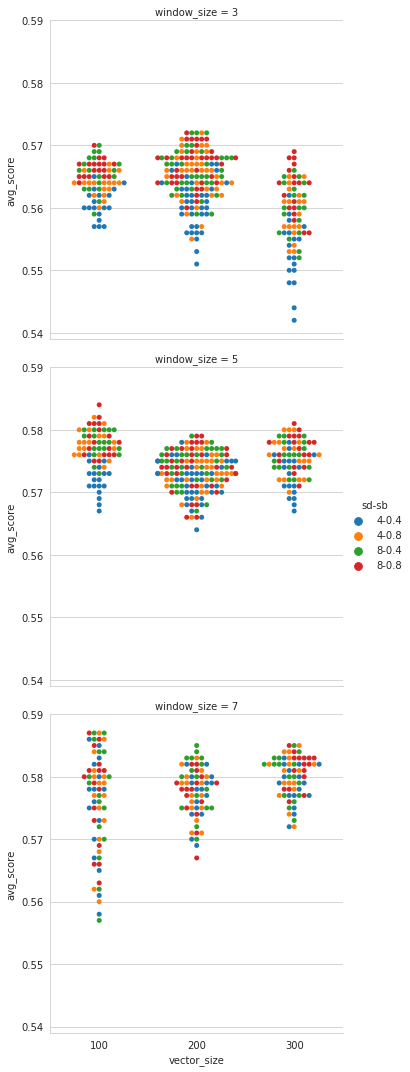

In [50]:
sns.catplot("vector_size", "avg_score", data=data_d2v[(data_d2v['epoch']>3)&(data_d2v['strong_draws']>2)&(data_d2v['strong_beta']>0.2)&(data_d2v['vector_size']>50)], kind='swarm', row='window_size', hue='sd-sb').set(ylim=(0.539,0.59))

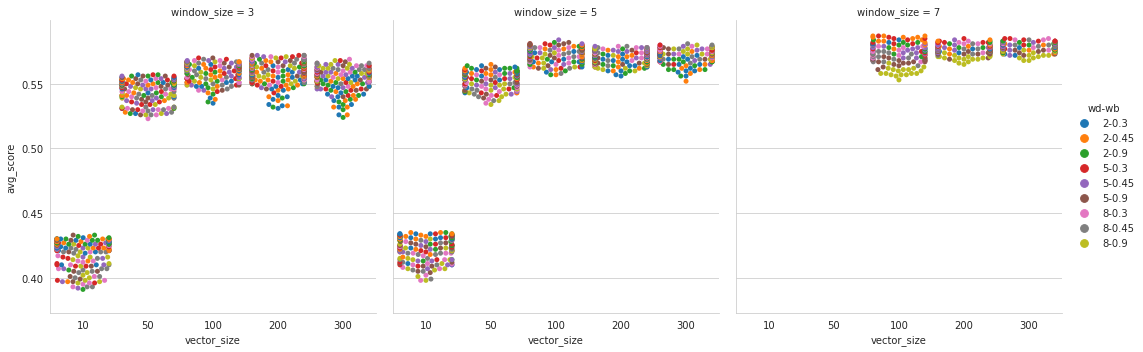

In [51]:
sns.catplot("vector_size", "avg_score", data=data_d2v[data_d2v['epoch']>3], kind='swarm', col='window_size', hue='wd-wb')

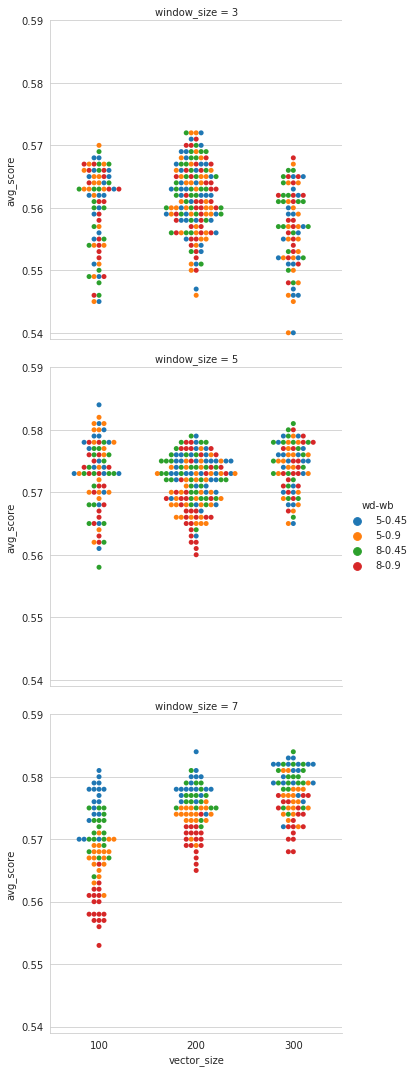

In [52]:
sns.catplot("vector_size", "avg_score", data=data_d2v[(data_d2v['epoch']>3)&(data_d2v['weak_draws']>2)&(data_d2v['weak_beta']>0.3)&(data_d2v['vector_size']>50)], kind='swarm', row='window_size', hue='wd-wb').set(ylim=(0.539,0.59))

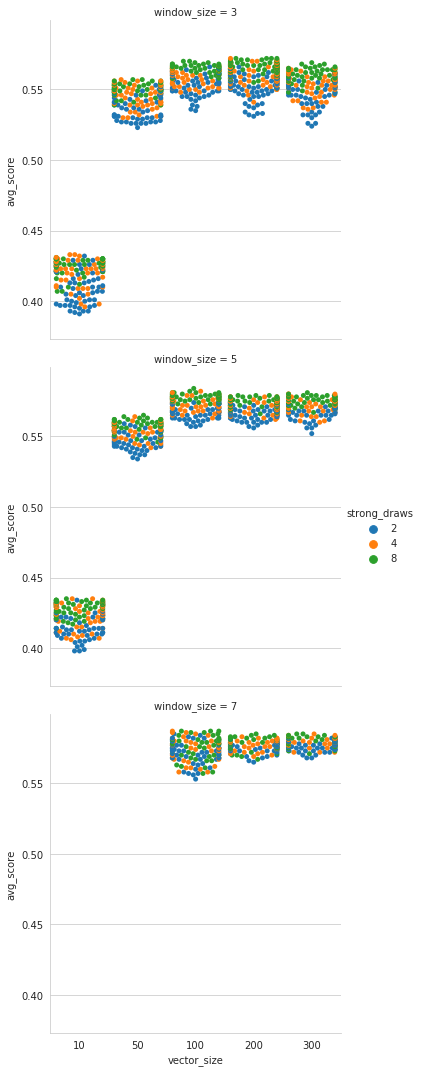

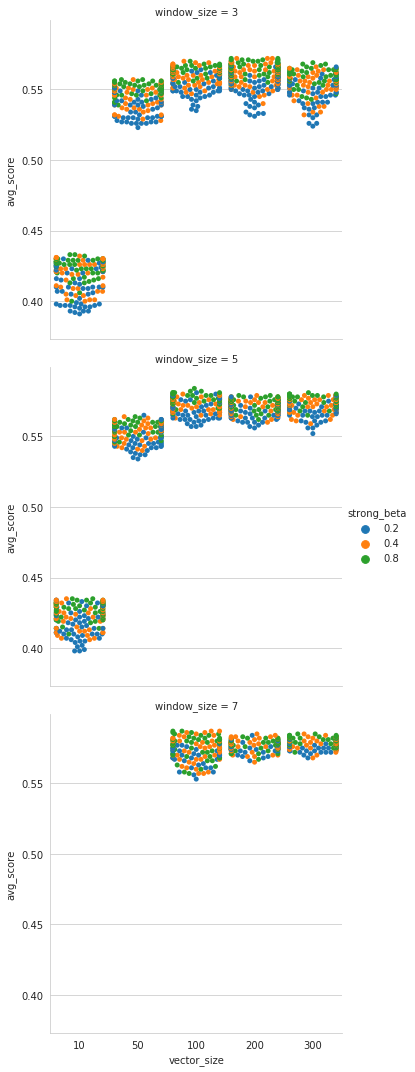

In [53]:
sns.catplot("vector_size", "avg_score", data=data_d2v[data_d2v['epoch']>3], kind='swarm', row='window_size', hue='strong_draws')
sns.catplot("vector_size", "avg_score", data=data_d2v[data_d2v['epoch']>3], kind='swarm', row='window_size', hue='strong_beta')

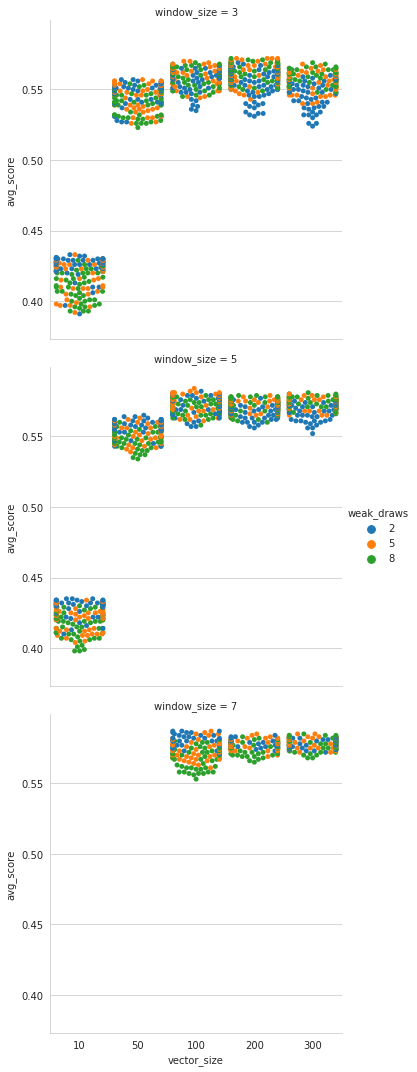

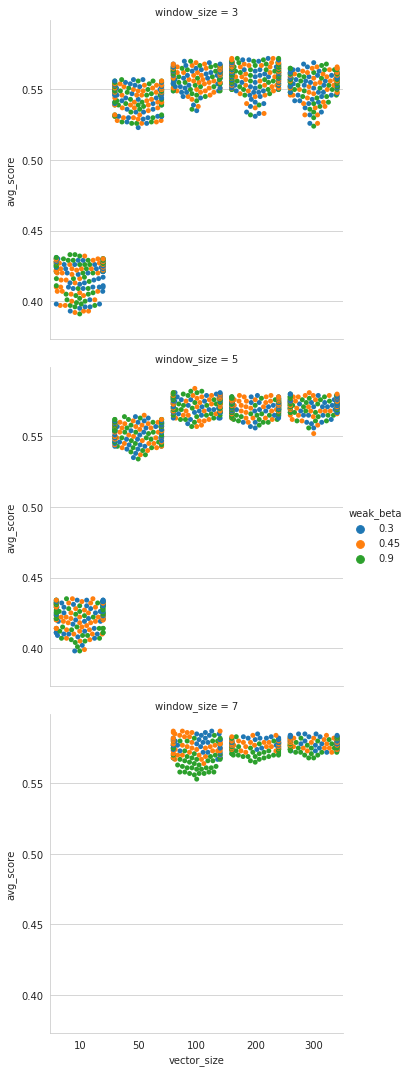

In [54]:
sns.catplot("vector_size", "avg_score", data=data_d2v[data_d2v['epoch']>3], kind='swarm', row='window_size', hue='weak_draws')
sns.catplot("vector_size", "avg_score", data=data_d2v[data_d2v['epoch']>3], kind='swarm', row='window_size', hue='weak_beta')

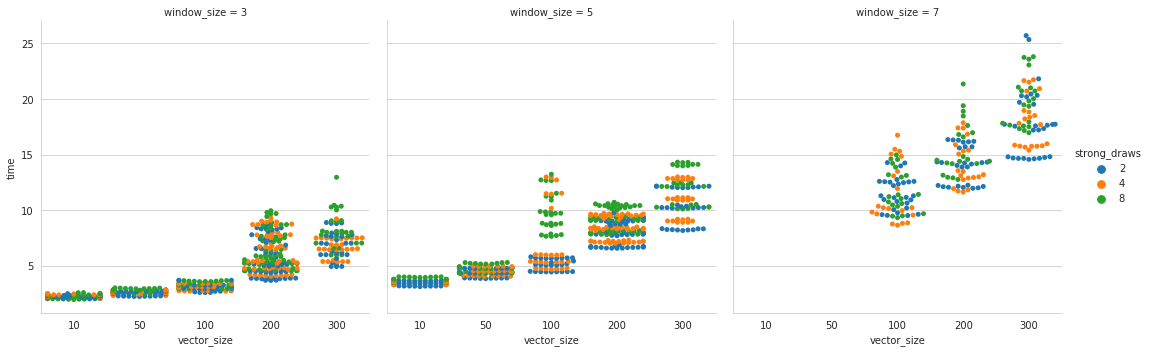

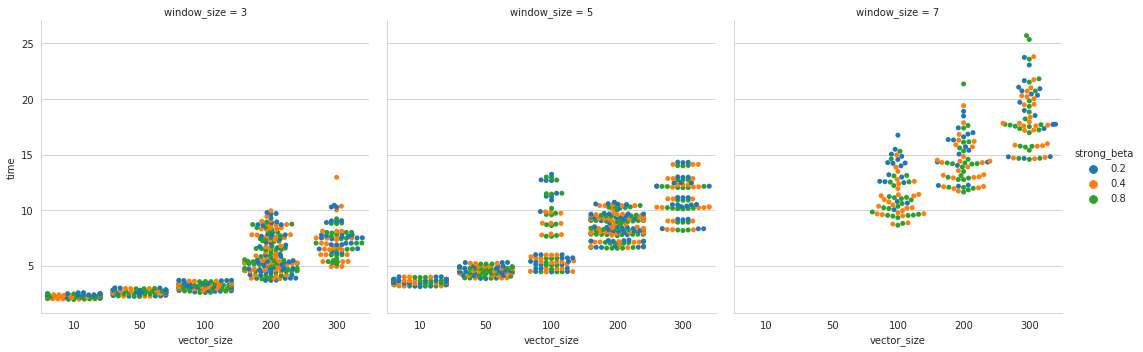

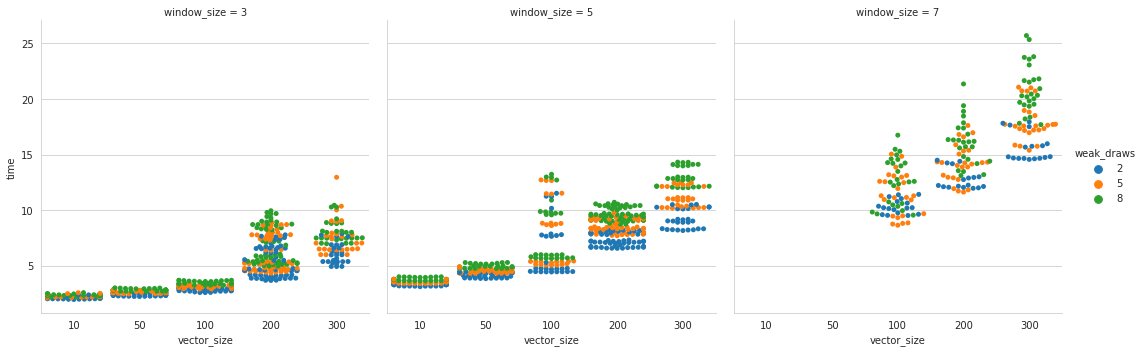

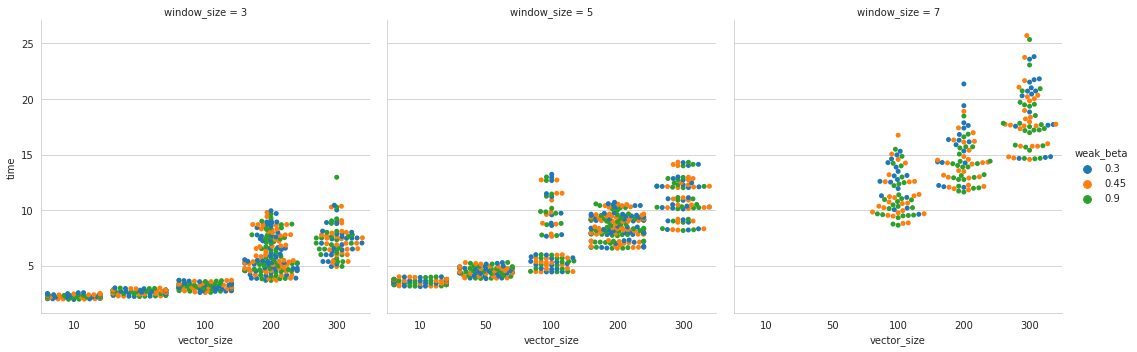

In [55]:
sns.catplot("vector_size", "time", data=data_d2v[data_d2v['epoch']==7], kind='swarm', col='window_size', hue='strong_draws')
sns.catplot("vector_size", "time", data=data_d2v[data_d2v['epoch']==7], kind='swarm', col='window_size', hue='strong_beta')
sns.catplot("vector_size", "time", data=data_d2v[data_d2v['epoch']==7], kind='swarm', col='window_size', hue='weak_draws')
sns.catplot("vector_size", "time", data=data_d2v[data_d2v['epoch']==7], kind='swarm', col='window_size', hue='weak_beta')

In [56]:
cols = ['epoch', 'vector_size', 'window_size', 'strong_draws', 'strong_beta', 'weak_draws', 'weak_beta', 'avg_score', 'time']
data_d2v[cols].sort_values('avg_score', ascending=False).head()

epoch  vector_size  window_size  strong_draws  strong_beta  weak_draws  \
4527      7          100            7             8          0.8           2   
4615      7          100            7             8          0.4           5   
4519      7          100            7             8          0.4           2   
4511      7          100            7             4          0.8           2   
4526      5          100            7             8          0.8           2   

      weak_beta  avg_score    time  
4527       0.45      0.587  11.210  
4615       0.30      0.587  13.864  
4519       0.45      0.587  11.410  
4511       0.45      0.587  10.211  
4526       0.45      0.586  11.210

In [57]:
cols = ['epoch', 'vector_size', 'window_size', 'strong_draws', 'strong_beta', 'weak_draws', 'weak_beta', 'avg_score', 'time']
data_d2v[cols].sort_values('avg_score', ascending=False).head()

epoch  vector_size  window_size  strong_draws  strong_beta  weak_draws  \
4527      7          100            7             8          0.8           2   
4615      7          100            7             8          0.4           5   
4519      7          100            7             8          0.4           2   
4511      7          100            7             4          0.8           2   
4526      5          100            7             8          0.8           2   

      weak_beta  avg_score    time  
4527       0.45      0.587  11.210  
4615       0.30      0.587  13.864  
4519       0.45      0.587  11.410  
4511       0.45      0.587  10.211  
4526       0.45      0.586  11.210

## DictFastText

In [58]:
data_dft = data[data['algorithm']=='dft']
data_dft.loc[:,'ngrams'] = data_dft['ngrams'].astype('int')
data_dft.loc[:,'strong_draws'] = data_dft['strong_draws'].astype('int')
data_dft.loc[:,'weak_draws'] = data_dft['weak_draws'].astype('int')
data_dft.head()

algorithm  avg_score  epoch  experiment  learning_rate  mc-30  mc-30_oov  \
1       dft      0.443      3           1          0.025  0.772          0   
2       dft      0.468      5           1          0.025  0.728          0   
3       dft      0.480      7           1          0.025  0.793          0   
5       dft      0.439      3           2          0.025  0.714          0   
6       dft      0.463      5           2          0.025  0.786          0   

   men-tr-3k  men-tr-3k_oov  mturk-287     ...      weak_draws  window_size  \
1      0.606              0      0.579     ...               5            3   
2      0.621              0      0.584     ...               5            3   
3      0.636              0      0.596     ...               5            3   
5      0.595              0      0.584     ...               5            3   
6      0.612              0      0.584     ...               5            3   

   ws-353-all  ws-353-all_oov  ws-353-rel  ws-353-rel_oov  ws-353-sim  \
1       0.644               0       0.595               0       0.674   
2       0.666               0       0.589               0       0.695   
3       0.685               0       0.614               0       0.718   
5       0.646               0       0.576               0       0.686   
6       0.673               0       0.593               0       0.708   

   ws-353-sim_oov  yp-130  yp-130_oov  
1               0   0.428           0  
2               0   0.447           0  
3               0   0.481           0  
5               0   0.368           0  
6               0   0.469           0  

[5 rows x 40 columns]

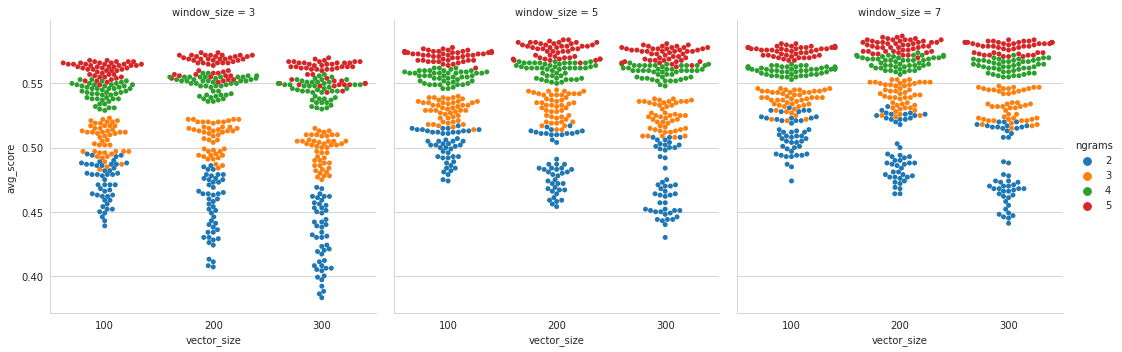

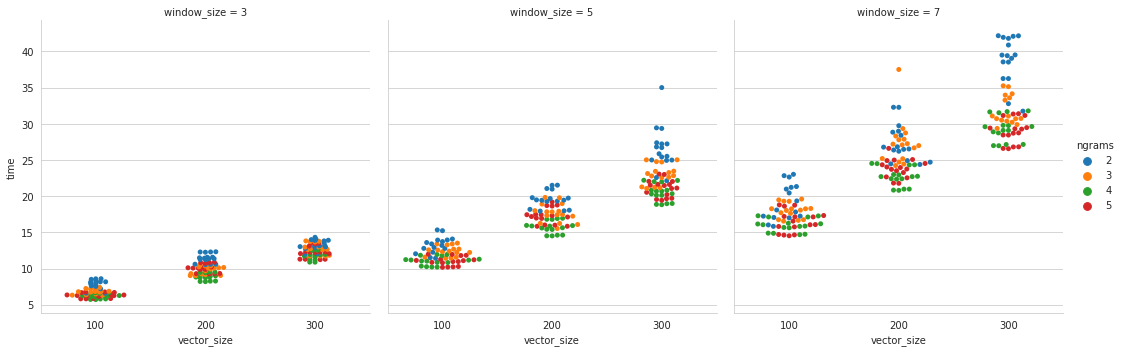

In [60]:
sns.catplot("vector_size", "avg_score", data=data_dft, kind='swarm', col='window_size', hue='ngrams')
sns.catplot("vector_size", "time", data=data_dft[data_dft['epoch']==7], kind='swarm', col='window_size', hue='ngrams')

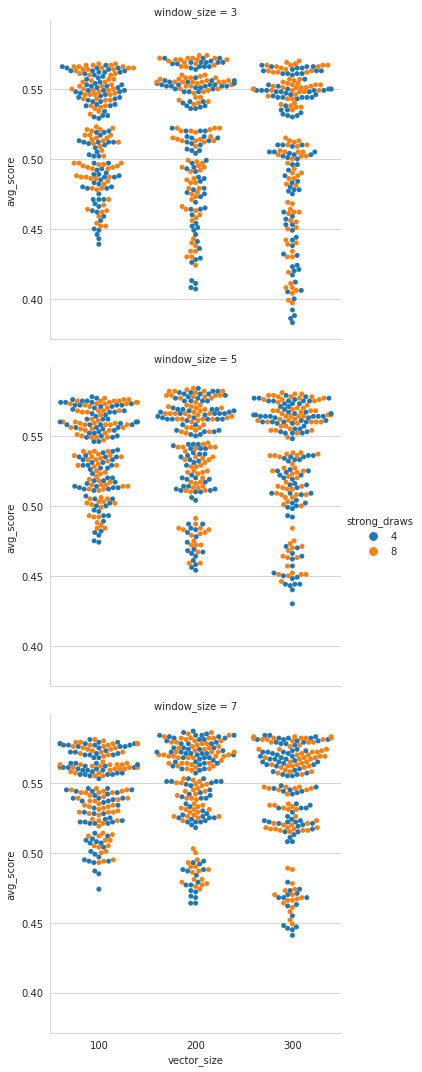

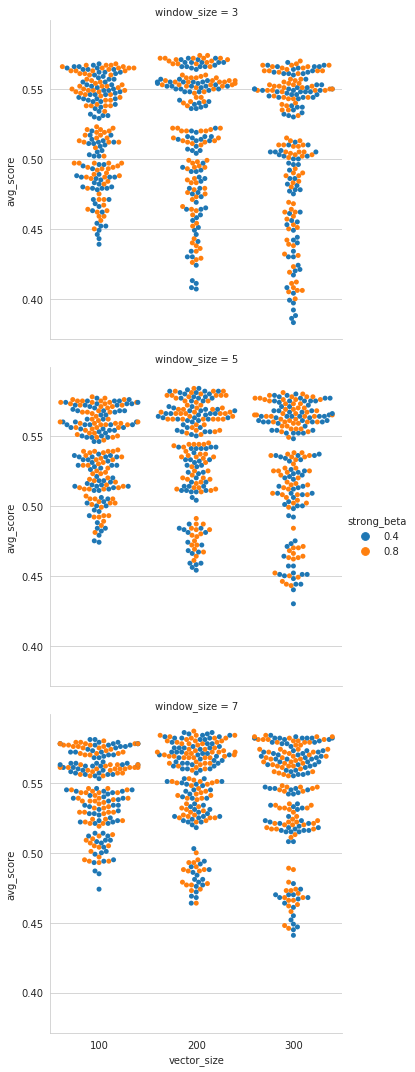

In [61]:
sns.catplot("vector_size", "avg_score", data=data_dft, kind='swarm', row='window_size', hue='strong_draws')
sns.catplot("vector_size", "avg_score", data=data_dft, kind='swarm', row='window_size', hue='strong_beta')

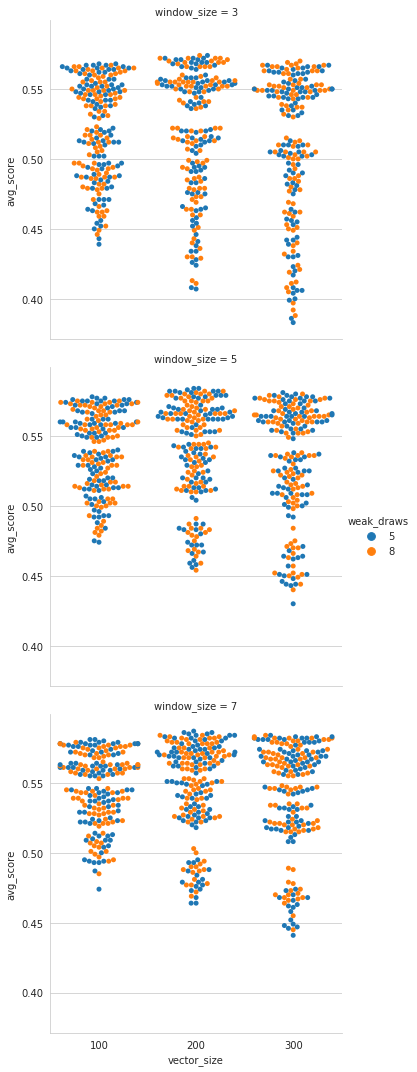

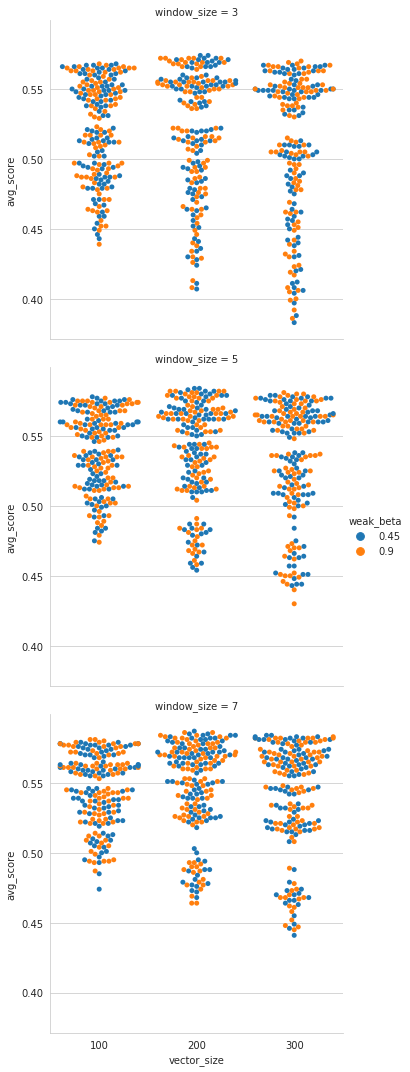

In [62]:
sns.catplot("vector_size", "avg_score", data=data_dft, kind='swarm', row='window_size', hue='weak_draws')
sns.catplot("vector_size", "avg_score", data=data_dft, kind='swarm', row='window_size', hue='weak_beta')

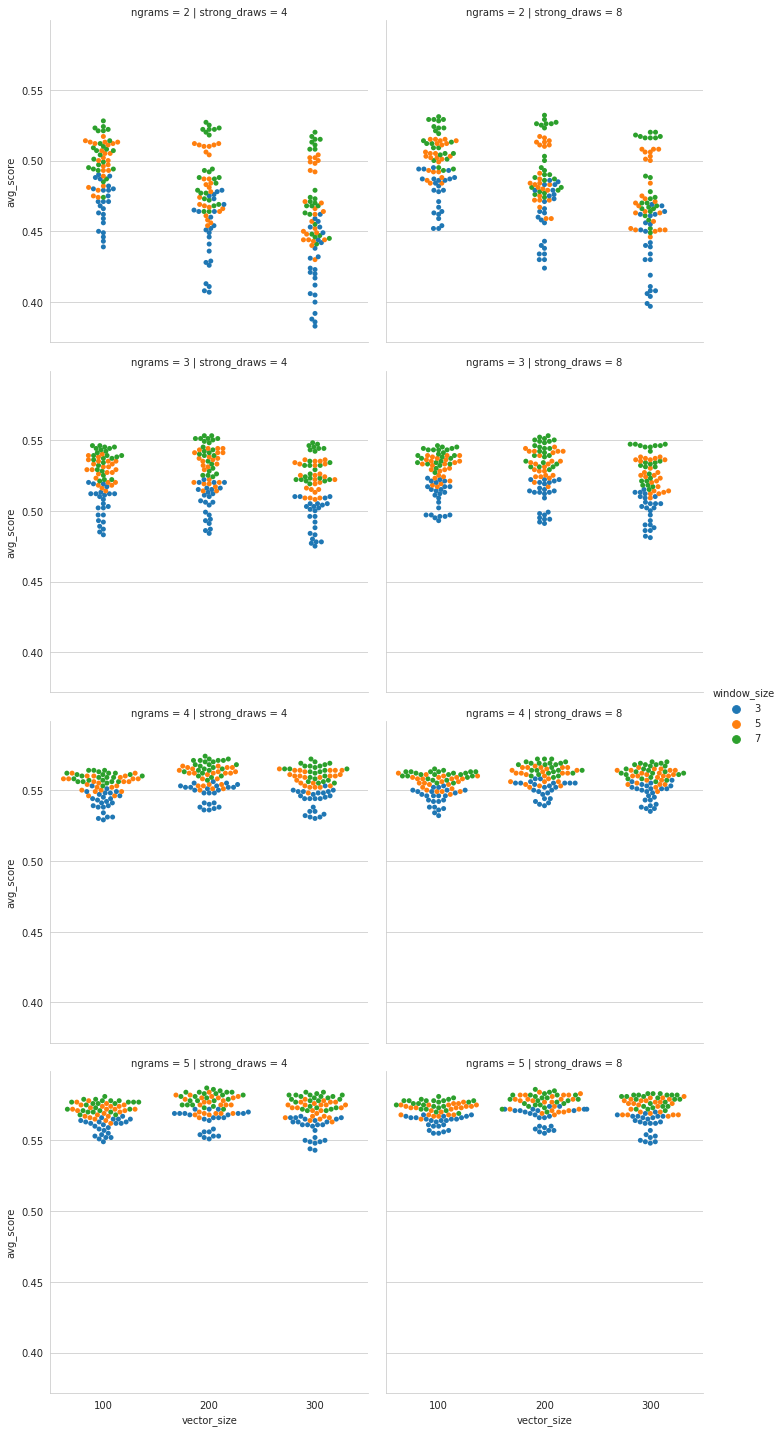

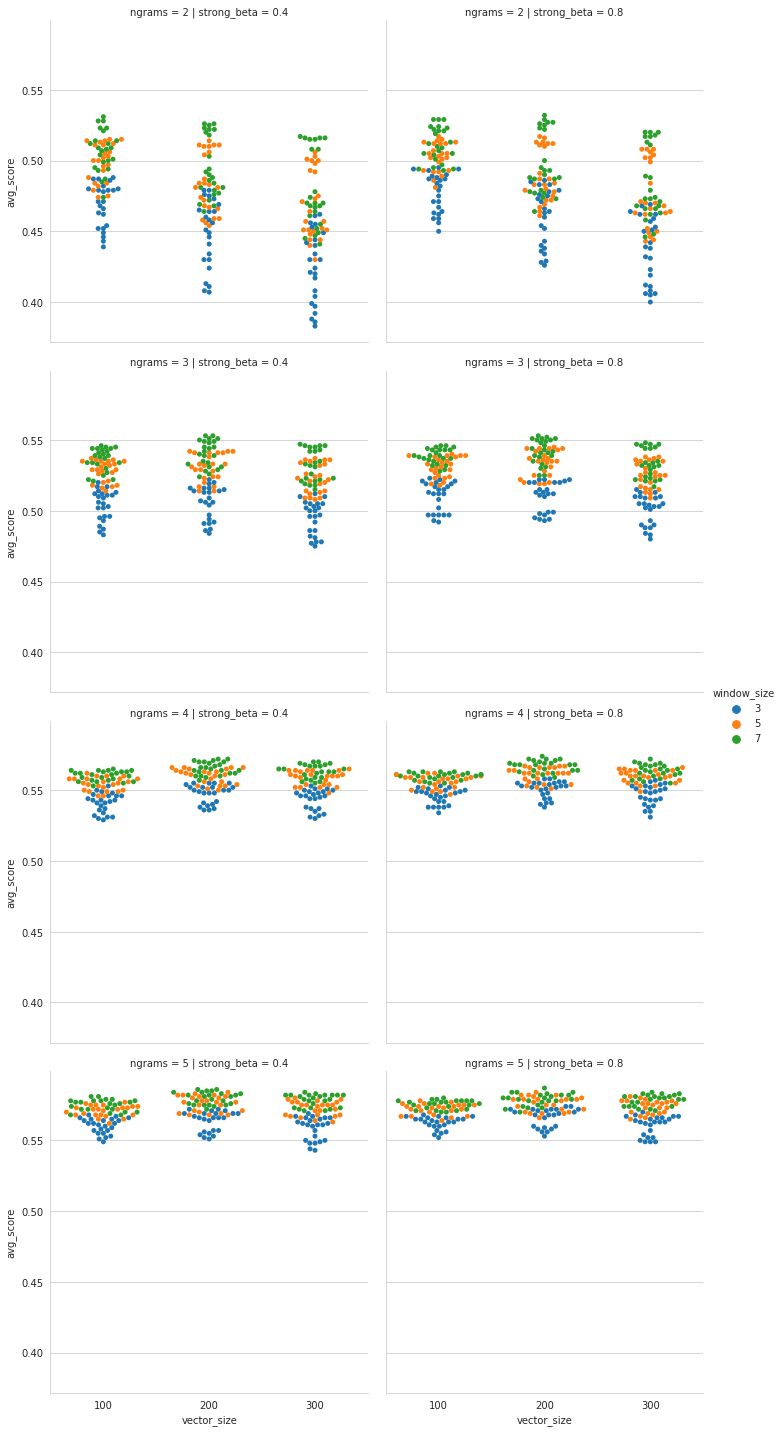

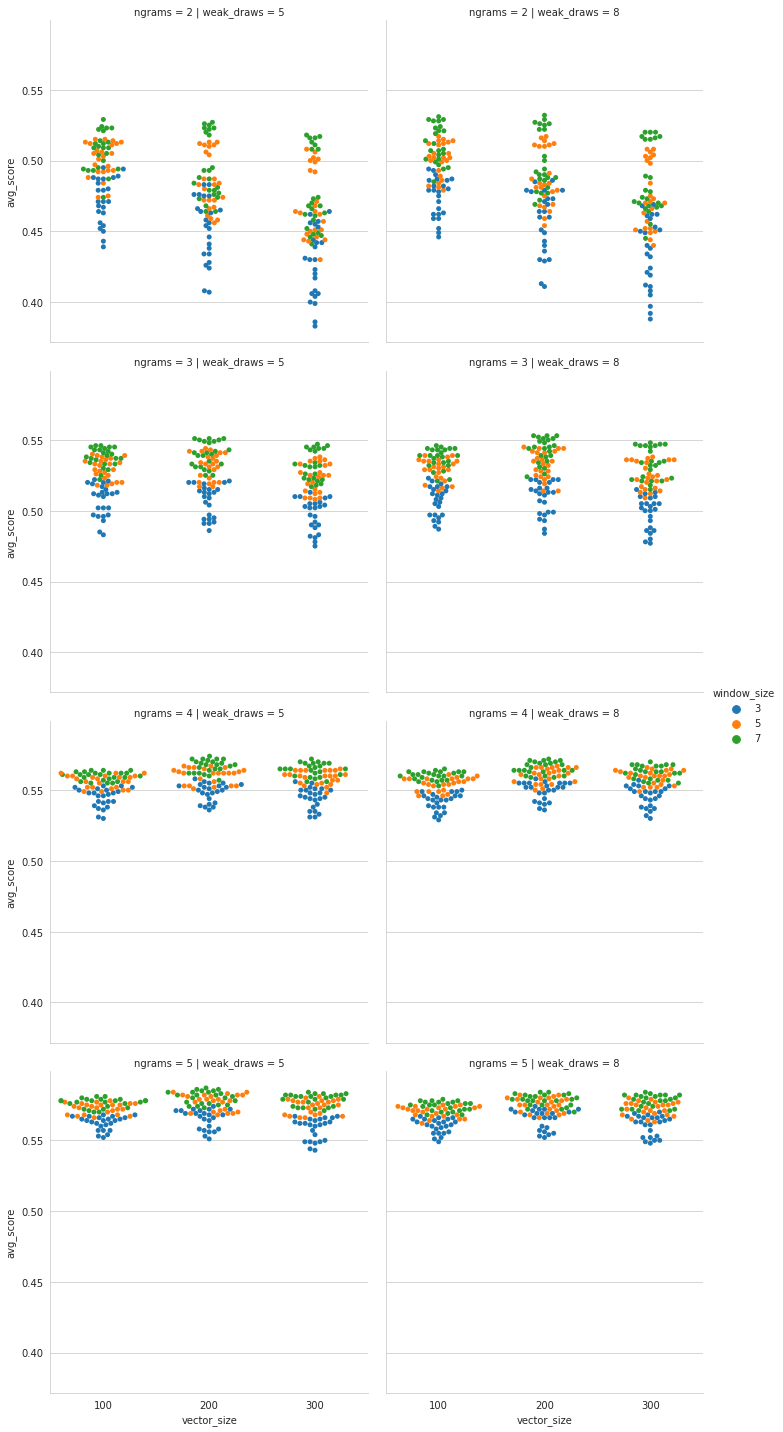

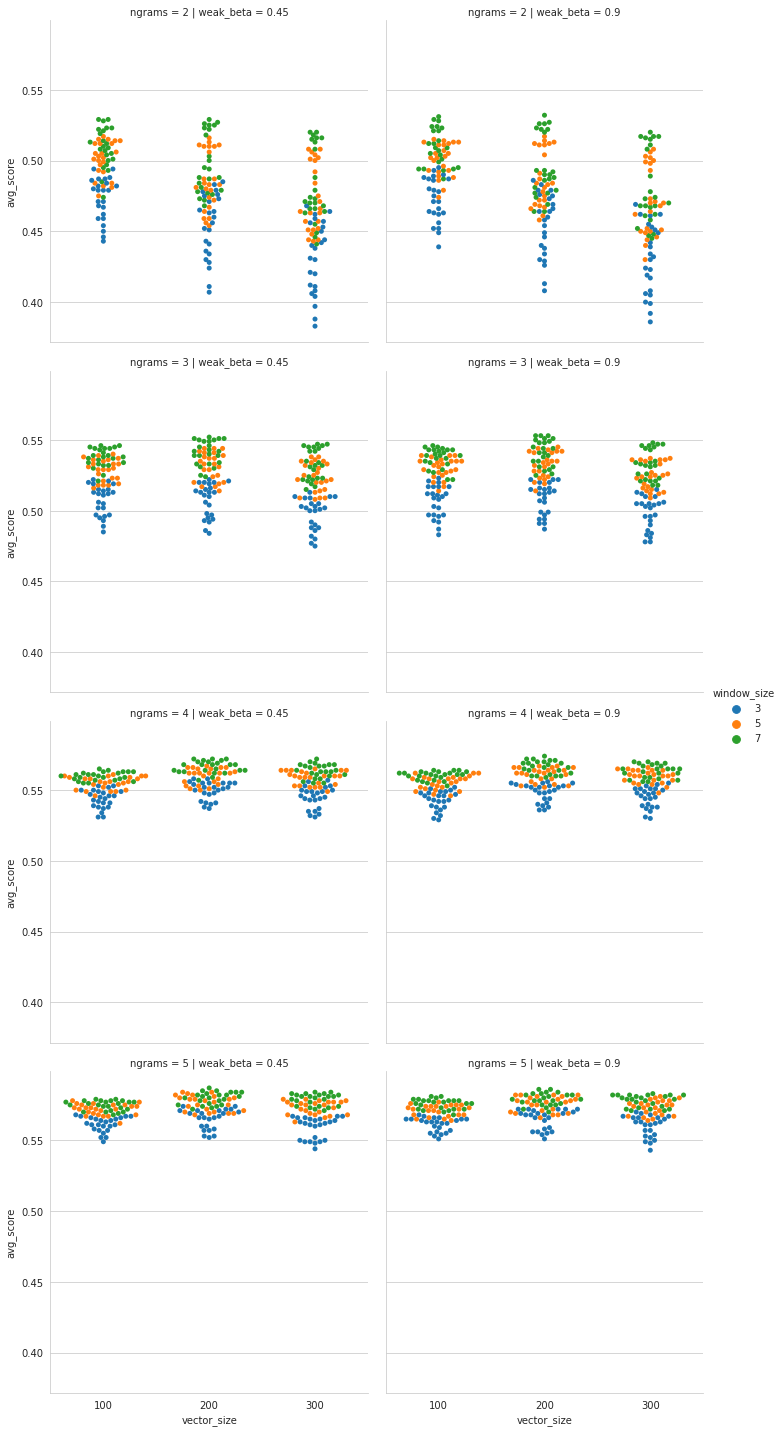

In [63]:
sns.catplot("vector_size", "avg_score", data=data_dft, kind='swarm', row='ngrams', col='strong_draws', hue='window_size')
sns.catplot("vector_size", "avg_score", data=data_dft, kind='swarm', row='ngrams', col='strong_beta', hue='window_size')
sns.catplot("vector_size", "avg_score", data=data_dft, kind='swarm', row='ngrams', col='weak_draws', hue='window_size')
sns.catplot("vector_size", "avg_score", data=data_dft, kind='swarm', row='ngrams', col='weak_beta', hue='window_size')

In [64]:
cols = ['epoch', 'vector_size', 'window_size', 'ngrams', 'strong_draws', 'strong_beta', 'weak_draws', 'weak_beta', 'avg_score', 'time']
data_dft[cols].sort_values('avg_score', ascending=False).head()

epoch  vector_size  window_size  ngrams  strong_draws  strong_beta  \
2067      7          200            7       5             4          0.8   
2055      7          200            7       5             4          0.4   
2087      7          200            7       5             8          0.4   
2083      7          200            7       5             8          0.4   
2051      7          200            7       5             4          0.4   

      weak_draws  weak_beta  avg_score    time  
2067           5       0.45      0.587  22.657  
2055           5       0.90      0.586  24.335  
2087           5       0.90      0.586  23.514  
2083           5       0.45      0.585  24.517  
2051           5       0.45      0.585  23.260

## Comparative analysis

In [66]:
data = data_w2v.append(data_sw).append(data_d2v).append(data_ft).append(data_dft)
data_all = data[(data['epoch']> 1)&(~data['ngrams'].isin([2,3]))&(data['sampling']<-1)&(data['negative_sampling']<20)]

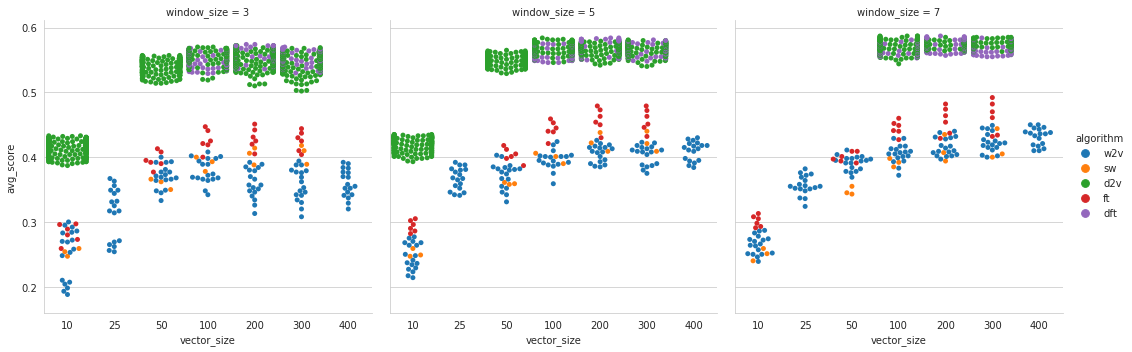

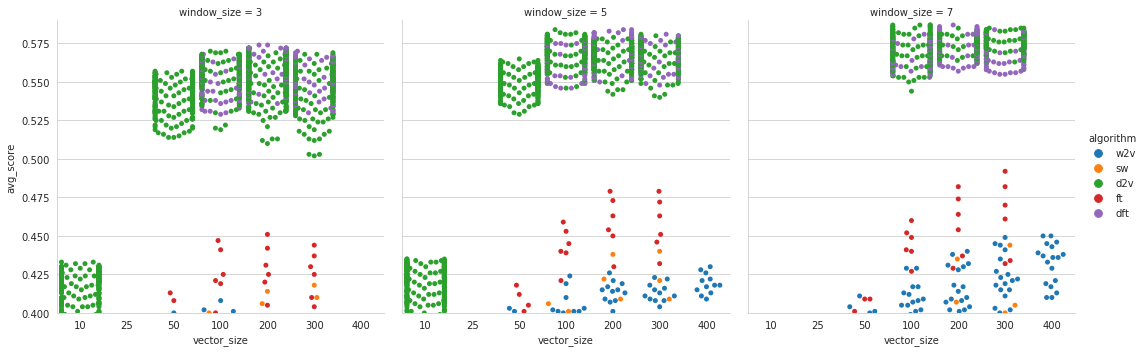

In [67]:
sns.catplot("vector_size", "avg_score", data=data_all, kind='swarm', col='window_size', hue='algorithm')
sns.catplot("vector_size", "avg_score", data=data_all, kind='swarm', col='window_size', hue='algorithm').set(ylim=(0.4,0.59))

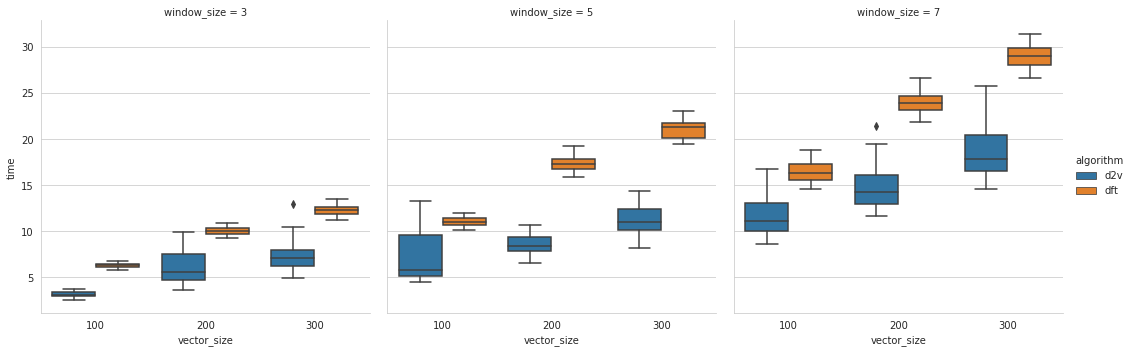

In [68]:
mask = (data_all['epoch']==7)&(data_all['algorithm'].isin(['d2v','dft']))&(~data_all['ngrams'].isin([3,4]))&(data_all['vector_size']>50)
sns.catplot("vector_size", "time", data=data_all[mask], kind='box', col='window_size', hue='algorithm')

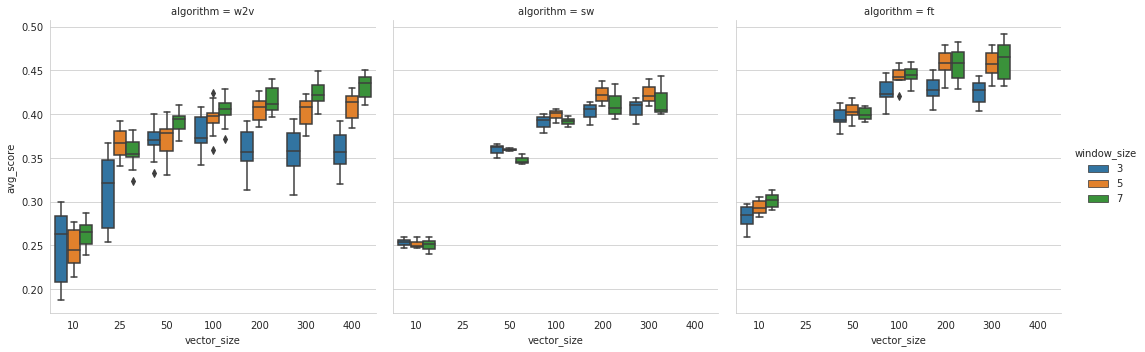

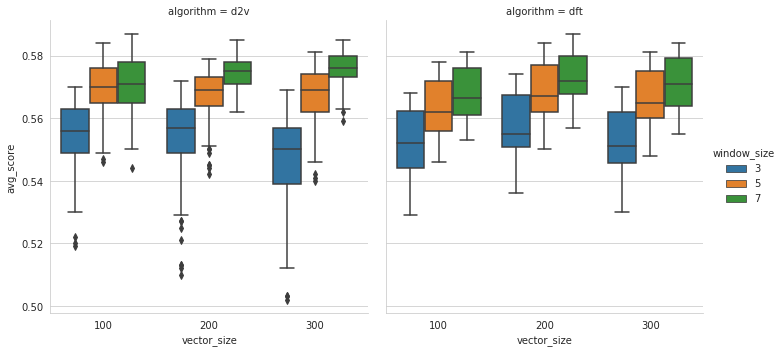

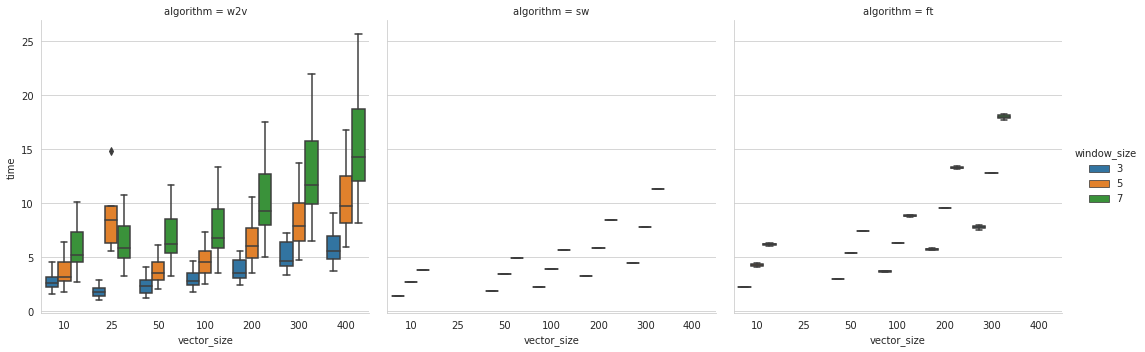

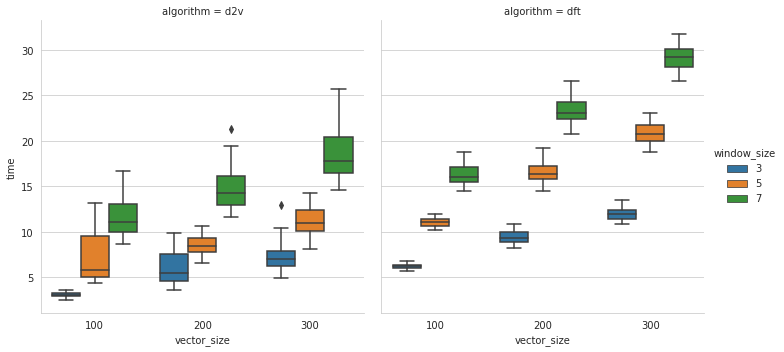

In [69]:
sns.catplot("vector_size", "avg_score", data=data_all[data_all['algorithm'].isin(['w2v', 'ft', 'sw'])], kind='box', col='algorithm', hue='window_size')
sns.catplot("vector_size", "avg_score", data=data_all[data_all['algorithm'].isin(['d2v', 'dft'])&(data_all['vector_size']>50)], kind='box', col='algorithm', hue='window_size')
sns.catplot("vector_size", "time", data=data_all[(data_all['epoch']==7)&(data_all['algorithm'].isin(['w2v', 'ft', 'sw']))], kind='box', col='algorithm', hue='window_size', col_wrap=3)
sns.catplot("vector_size", "time", data=data_all[(data_all['epoch']==7)&(data_all['algorithm'].isin(['d2v', 'dft']))&(data_all['vector_size']>50)], kind='box', col='algorithm', hue='window_size')

In [70]:
cols = ['algorithm', 'epoch', 'vector_size', 'window_size', 'ngrams', 'strong_draws', 'strong_beta', 'weak_draws', 'weak_beta', 'avg_score', 'time']
data = data_w2v.append(data_sw).append(data_d2v).append(data_ft).append(data_dft).reset_index(drop=True)
data.loc[data.groupby(['algorithm'])['avg_score'].idxmax()][cols].sort_values('avg_score', ascending=False)

algorithm  epoch  vector_size  window_size  ngrams  strong_draws  \
4274       d2v      7          100            7     NaN           4.0   
6140       dft      7          200            7     5.0           4.0   
4589        ft      7          300            7     5.0           NaN   
740        w2v      7          400            7     NaN           NaN   
890         sw      7          300            7     4.0           NaN   

      strong_beta  weak_draws  weak_beta  avg_score    time  
4274          0.8         2.0       0.45      0.587  10.211  
6140          0.8         5.0       0.45      0.587  22.657  
4589          NaN         NaN        NaN      0.492  17.731  
740           NaN         NaN        NaN      0.450  14.295  
890           NaN         NaN        NaN      0.444  11.336

## Task analysis

In [71]:
data_tasks = data.reset_index(drop=True)
data_tasks['mean_score'] = (data_tasks[['mc-30', 'men-tr-3k', 'mturk-287', 'mturk-771', 'rg-65', 'rw-stanford', 
                                       'simlex999', 'simverb-3500', 'ws-353-all', 'ws-353-rel', 'ws-353-sim', 
                                       'yp-130']].sum(axis=1)/12).round(3)
data_tasks = data_tasks[['algorithm', 'avg_score', 'mean_score', 'mc-30', 'men-tr-3k', 'mturk-287', 'mturk-771', 
                         'rg-65', 'rw-stanford', 'rw-stanford_oov', 'simlex999', 
                         'simverb-3500', 'simverb-3500_oov', 'ws-353-all', 'ws-353-rel', 'ws-353-sim', 
                         'yp-130', 'yp-130_oov']]

In [72]:
data_tasks.loc[data_tasks.groupby('algorithm')['avg_score'].idxmax()].sort_values('avg_score', ascending=False).T

4274   6140   4589   740    890 
algorithm           d2v    dft     ft    w2v     sw
avg_score         0.587  0.587  0.492   0.45  0.444
mean_score        0.669   0.67  0.603  0.552  0.532
mc-30             0.814  0.821  0.769  0.759  0.634
men-tr-3k         0.735  0.741   0.71  0.651   0.68
mturk-287          0.63  0.633  0.653  0.622  0.609
mturk-771         0.683  0.694  0.616  0.586  0.569
rg-65             0.836  0.871  0.716  0.686  0.616
rw-stanford       0.528  0.543  0.468  0.375  0.372
rw-stanford_oov      37      8      8     37      2
simlex999         0.477  0.473  0.369  0.365  0.342
simverb-3500      0.438  0.439  0.252  0.225  0.222
simverb-3500_oov      2      1      1      2      0
ws-353-all        0.755  0.748  0.704  0.675  0.634
ws-353-rel        0.694  0.684  0.666  0.604  0.612
ws-353-sim        0.766  0.751  0.751  0.739  0.666
yp-130            0.672   0.64  0.567  0.343  0.429
yp-130_oov            3      3      3      3      0

In [73]:
d2v_indices_avg = data_tasks[data_tasks['algorithm'] == 'd2v'].sort_values('avg_score', ascending=False)[:5].index
d2v_indices_mean = data_tasks[data_tasks['algorithm'] == 'd2v'].sort_values('mean_score', ascending=False)[:5].index
dft_indices_avg = data_tasks[data_tasks['algorithm'] == 'dft'].sort_values('avg_score', ascending=False)[:5].index
dft_indices_mean = data_tasks[data_tasks['algorithm'] == 'dft'].sort_values('mean_score', ascending=False)[:5].index
print('Dict2vec indices avg:', d2v_indices_avg)
print('Dict2vec indices mean:', d2v_indices_mean)
print('DictFastText indices avg:', dft_indices_avg)
print('DictFastText indices mean:', dft_indices_mean)

Dict2vec indices avg: Int64Index([4286, 4352, 4280, 4274, 4285], dtype='int64')
Dict2vec indices mean: Int64Index([4280, 4285, 4286, 4352, 4268], dtype='int64')
DictFastText indices avg: Int64Index([6140, 6131, 6155, 6152, 6128], dtype='int64')
DictFastText indices mean: Int64Index([6026, 6128, 6023, 6131, 6134], dtype='int64')


In [74]:
data_tasks.loc[d2v_indices_avg]

algorithm  avg_score  mean_score  mc-30  men-tr-3k  mturk-287  mturk-771  \
4286       d2v      0.587       0.674  0.834      0.729      0.639      0.691   
4352       d2v      0.587       0.673  0.821      0.737      0.648      0.688   
4280       d2v      0.587       0.675  0.835      0.739      0.627      0.690   
4274       d2v      0.587       0.669  0.814      0.735      0.630      0.683   
4285       d2v      0.586       0.674  0.839      0.727      0.635      0.691   

      rg-65  rw-stanford  rw-stanford_oov  simlex999  simverb-3500  \
4286  0.873        0.528               37      0.483         0.440   
4352  0.866        0.524               37      0.483         0.433   
4280  0.870        0.530               37      0.482         0.432   
4274  0.836        0.528               37      0.477         0.438   
4285  0.886        0.527               37      0.481         0.440   

      simverb-3500_oov  ws-353-all  ws-353-rel  ws-353-sim  yp-130  yp-130_oov  
4286                 2       0.757       0.696       0.770   0.649           3  
4352                 2       0.753       0.688       0.771   0.670           3  
4280                 2       0.750       0.688       0.771   0.682           3  
4274                 2       0.755       0.694       0.766   0.672           3  
4285                 2       0.755       0.699       0.770   0.642           3

In [75]:
data_tasks.loc[d2v_indices_mean]

algorithm  avg_score  mean_score  mc-30  men-tr-3k  mturk-287  mturk-771  \
4280       d2v      0.587       0.675  0.835      0.739      0.627      0.690   
4285       d2v      0.586       0.674  0.839      0.727      0.635      0.691   
4286       d2v      0.587       0.674  0.834      0.729      0.639      0.691   
4352       d2v      0.587       0.673  0.821      0.737      0.648      0.688   
4268       d2v      0.586       0.672  0.821      0.742      0.646      0.693   

      rg-65  rw-stanford  rw-stanford_oov  simlex999  simverb-3500  \
4280  0.870        0.530               37      0.482         0.432   
4285  0.886        0.527               37      0.481         0.440   
4286  0.873        0.528               37      0.483         0.440   
4352  0.866        0.524               37      0.483         0.433   
4268  0.853        0.524               37      0.472         0.429   

      simverb-3500_oov  ws-353-all  ws-353-rel  ws-353-sim  yp-130  yp-130_oov  
4280                 2       0.750       0.688       0.771   0.682           3  
4285                 2       0.755       0.699       0.770   0.642           3  
4286                 2       0.757       0.696       0.770   0.649           3  
4352                 2       0.753       0.688       0.771   0.670           3  
4268                 2       0.758       0.688       0.775   0.661           3

In [76]:
data_tasks.loc[dft_indices_avg]

algorithm  avg_score  mean_score  mc-30  men-tr-3k  mturk-287  mturk-771  \
6140       dft      0.587       0.670  0.821      0.741      0.633      0.694   
6131       dft      0.586       0.671  0.839      0.743      0.619      0.693   
6155       dft      0.586       0.670  0.826      0.742      0.631      0.684   
6152       dft      0.585       0.670  0.822      0.740      0.627      0.687   
6128       dft      0.585       0.672  0.835      0.744      0.626      0.693   

      rg-65  rw-stanford  rw-stanford_oov  simlex999  simverb-3500  \
6140  0.871        0.543                8      0.473         0.439   
6131  0.878        0.543                8      0.475         0.434   
6155  0.866        0.543                8      0.473         0.437   
6152  0.855        0.536                8      0.480         0.436   
6128  0.874        0.543                8      0.473         0.430   

      simverb-3500_oov  ws-353-all  ws-353-rel  ws-353-sim  yp-130  yp-130_oov  
6140                 1       0.748       0.684       0.751   0.640           3  
6131                 1       0.746       0.674       0.756   0.653           3  
6155                 1       0.750       0.680       0.753   0.656           3  
6152                 1       0.756       0.692       0.760   0.652           3  
6128                 1       0.752       0.678       0.752   0.661           3

In [77]:
data_tasks.loc[dft_indices_mean]

algorithm  avg_score  mean_score  mc-30  men-tr-3k  mturk-287  mturk-771  \
6026       dft      0.578       0.672  0.836      0.733      0.635      0.675   
6128       dft      0.585       0.672  0.835      0.744      0.626      0.693   
6023       dft      0.580       0.672  0.826      0.728      0.632      0.683   
6131       dft      0.586       0.671  0.839      0.743      0.619      0.693   
6134       dft      0.584       0.671  0.819      0.742      0.627      0.687   

      rg-65  rw-stanford  rw-stanford_oov  simlex999  simverb-3500  \
6026  0.843        0.520                8      0.474         0.430   
6128  0.874        0.543                8      0.473         0.430   
6023  0.845        0.526                8      0.472         0.436   
6131  0.878        0.543                8      0.475         0.434   
6134  0.876        0.539                8      0.471         0.434   

      simverb-3500_oov  ws-353-all  ws-353-rel  ws-353-sim  yp-130  yp-130_oov  
6026                 1       0.761       0.698       0.773   0.689           3  
6128                 1       0.752       0.678       0.752   0.661           3  
6023                 1       0.755       0.685       0.780   0.691           3  
6131                 1       0.746       0.674       0.756   0.653           3  
6134                 1       0.751       0.676       0.757   0.667           3

## Diffvec

In [78]:
diffvec_data = pd.read_csv(os.path.join(base_folder, 'diffvec.csv'))

In [79]:
diffvec_data.columns

Index(['algorithm', 'nclusters', 'vscore'], dtype='object')

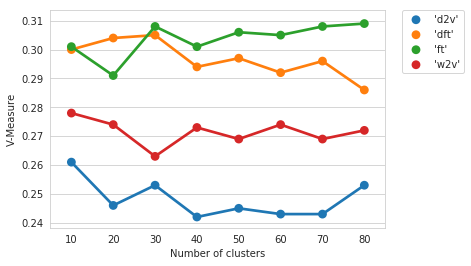

In [80]:
sns.pointplot("nclusters", "vscore", data=diffvec_data, hue='algorithm')
plt.xlabel('Number of clusters')
plt.ylabel('V-Measure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)